# Computer Science Final Project: Early Alzheimer's Detection

## Introduction
<p>In my Final Year Project, I will be working on <b>identifying Alzheimer's Disease early through Deep Neural Networks</b>.</p>
<p><b>Alzheimer's Disease</b> is a neurodegenerative incurable disease which is commonly associated with the reasons for dementia. It is a progressive disease that starts with memory loss and progresses to the inability to perform any human interactions and respond to the environment. Detecting Alzheimer's early can help the patient understand their condition and take the necessary steps to prolong life and seek appropriate treatment.</p>
<p>In this project, I would be focusing on developing a deep learning multi-classifier model to detect the stages of Alzheimer's Disease as follows:</p>
</br>
<b><ol>
    <li>Mild Demented</li>
    <li>Moderate Demented</li>
    <li>Non-Demented</li>
    <li>Very Mild Demented</li>
</ol></b>
</br>
<p>Firstly, I will develop some pre-processing steps for the image data. I will be analysing if data augmentation is necessary for the dataset I will be working on, Brain MRI data on stages of Alzheimer's Disease, which was retrieved from the Kaggle datasets website.</p>
<p>Then, the deep learning model which is better than the naive baseline will be built. The evaluation metrics: <b>Area under ROC curve(AUC), Accuracy, Precision, Recall, Loss Function and F1-score</b> will be used to evaluate the baseline model. This evaluation would include a version where augmented MRI scans will be experimented on whereas the other would be based on the dataset without augmentation. <b>AUC</b> would be the <b>more important metric</b> that would be looked upon as the <b>dataset being used is heavily imbalanced</b>. Hence, AUC is more suitable to determine if the model is performing well. Additionally, to <b>cater to the issue of class imbalance</b>, the <b>class weights will be computed</b> and <b>fitted to the models</b> being built in this project. The <b>confusion matrix plot</b> was also used to determine how many correct predictions were made by the model which will <b>further help with the analysis</b> of choosing the <b>most optimal model</b>.</p>
<p>After the baseline model is developed, more models are built using various techniques such as <b>Hybrid Modelling</b>. <b>Transfer learning</b> by <b>combining model layers</b> is also applied to find the optimal multi-classifier model <b>to detect the stages of Alzheimer's Disease early</b> so that early detection is possible.</p>

## Importing Libraries

In [1]:
# Importing mathematical libraries
import numpy as np
import pandas as pd
import random

# Libraries for data visualisations
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from tabulate import tabulate

#  To run a command in the Python script
import os 
from time import sleep 

# Displaying progress bars
import tqdm
from tqdm import tqdm
from tqdm.notebook import tqdm

# To return all file paths that match a specific pattern
import glob 

# Importing sklearn libraries for permutation,evaluation metrics
from sklearn.utils import shuffle, class_weight
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# For image processing
from skimage.io import imread, imshow
from skimage.io import imread_collection
from skimage.transform import resize
from skimage import io
from skimage.color import rgb2gray
from PIL import Image

# Processing image data and building the model
import tensorflow
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, preprocessing, svm
import cv2

# Building the model
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Input, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D, GlobalAveragePooling2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Concatenate, concatenate,TimeDistributed, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

# Pretrained models
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.densenet import DenseNet121
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.vgg19 import VGG19,preprocess_input
from tensorflow.keras.applications.efficientnet import EfficientNetB0

from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
import sklearn.metrics as metrics

from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import plot_model
import pydot

In [2]:
#Load seaborn's default theme and color palette
sns.set()

In [3]:
np.random.seed(0)
tf.random.set_seed(0)

## Loading dataset

### No Data Augmentation

In [4]:
# define parameters
class_num = 4
size_batch = 32
shape_image = (128,128, 3)
target_size = (128,128)

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255, # Rescaling
        validation_split = 0.1,  # Splitting validation set from train dataset        
        fill_mode='nearest'
)

In [6]:
validation_datagen = ImageDataGenerator(rescale = 1./255, # Rescaling
                                        validation_split=0.1)

In [7]:
test_datagen = ImageDataGenerator(
        rescale=1./255, # Rescaling
) 

### Data Augmentation

In [8]:
train_datagen_w_data_aug = ImageDataGenerator(
        rescale=1./255, # Rescaling
        validation_split = 0.1,  # Splitting validation set from train dataset        
        rotation_range=5, # Rotation
        width_shift_range=0.2, # Shifting 
        height_shift_range=0.2, # Shifting 
        shear_range=0.2, # Applying shearing transformations
        zoom_range=0.2, # Zoom function
        horizontal_flip=True, # Flipping
        vertical_flip=True, # Flipping
        fill_mode='nearest')

In [9]:
validation_datagen_w_data_aug = ImageDataGenerator(rescale = 1./255, # Rescaling
                                        validation_split=0.1)

In [10]:
test_datagen_w_data_aug = ImageDataGenerator(
        rescale=1./255, # Rescaling
        shear_range=0.2, # Applying shearing transformations
        zoom_range=0.2, # Zoom function
        horizontal_flip=True # Flipping) 

### Loading dataset using train_datagen, validation_datagen and test_datagen

### No Data Augmentation

#### Training data

In [11]:
training_data = train_datagen.flow_from_directory(
        directory = r"./Alzheimers_dataset/Alzheimer_s Dataset/train/",
        target_size = target_size,
        class_mode = 'categorical',
        subset = 'training',
        batch_size = 32, 
        seed=42)

Found 4610 images belonging to 4 classes.


#### Validation data

In [12]:
validation_data = validation_datagen.flow_from_directory(
        directory = r"./Alzheimers_dataset/Alzheimer_s Dataset/train/",
        target_size = target_size,
        class_mode = 'categorical',
        subset = 'validation',
        batch_size = size_batch,
        seed=42)

Found 511 images belonging to 4 classes.


#### Test data

In [13]:
test_data = test_datagen.flow_from_directory(
        directory = r"./Alzheimers_dataset/Alzheimer_s Dataset/test/",
        target_size = target_size,
        batch_size = size_batch,
        class_mode='categorical',
        seed=42)

Found 1279 images belonging to 4 classes.


### Data Augmentation

#### Training data

In [14]:
training_data_w_data_aug = train_datagen_w_data_aug.flow_from_directory(
        directory = r"./Alzheimers_dataset/Alzheimer_s Dataset/train/",
        target_size = target_size,
        class_mode = 'categorical',
        subset = 'training',
        batch_size = size_batch, 
        seed=42)

Found 4610 images belonging to 4 classes.


In [15]:
validation_data_w_data_aug = validation_datagen_w_data_aug.flow_from_directory(
        directory = r"./Alzheimers_dataset/Alzheimer_s Dataset/train/",
        target_size = target_size,
        class_mode = 'categorical',
        subset = 'validation',
        batch_size = size_batch,
        seed=42)

Found 511 images belonging to 4 classes.


In [16]:
test_data_w_data_aug = test_datagen_w_data_aug.flow_from_directory(
        directory = r"./Alzheimers_dataset/Alzheimer_s Dataset/test/",
        target_size=target_size,
        batch_size=size_batch,
        class_mode='categorical',
        seed=42)

Found 1279 images belonging to 4 classes.


## Example of Preprocessed Images Display

In [17]:
# 4 classes: 'MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia'
stage_classes = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']

# Setting classes for classification to train, validation and test datasets' attribute: .stage_classes
training_data.stage_classes = stage_classes
validation_data.stage_classes = stage_classes
test_data.stage_classes = stage_classes

### Displaying 6 random images of non-augmented data vs augmented data from train to validation datasets

#### Training dataset

##### Non-augmented data

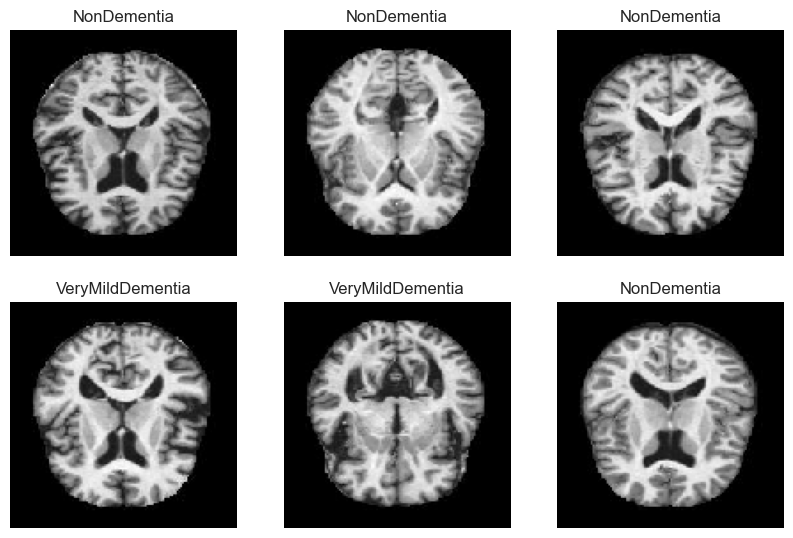

In [18]:
for mri_images, n_labels in training_data:
    plt.figure(figsize=(10,10))
    for i in range(6):
        plt.subplot(330 + 1 + i)
        plt.imshow(mri_images[i])
        n_classes = training_data.stage_classes[np.where(n_labels[i] == 1)[0][0]]
        plt.title(n_classes)
        plt.axis('off')
    plt.show()
    break

##### Augmented data

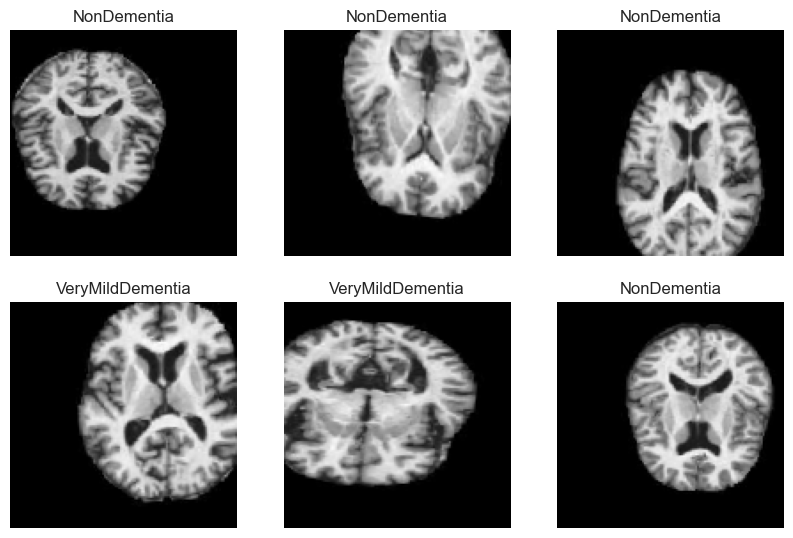

In [19]:
for mri_images, n_labels in training_data_w_data_aug:
    plt.figure(figsize=(10,10))
    for i in range(6):
        plt.subplot(330 + 1 + i)
        plt.imshow(mri_images[i])
        n_classes = training_data.stage_classes[np.where(n_labels[i] == 1)[0][0]]
        plt.title(n_classes)
        plt.axis('off')
    plt.show()
    break

#### Validation dataset

##### Non-augmented data

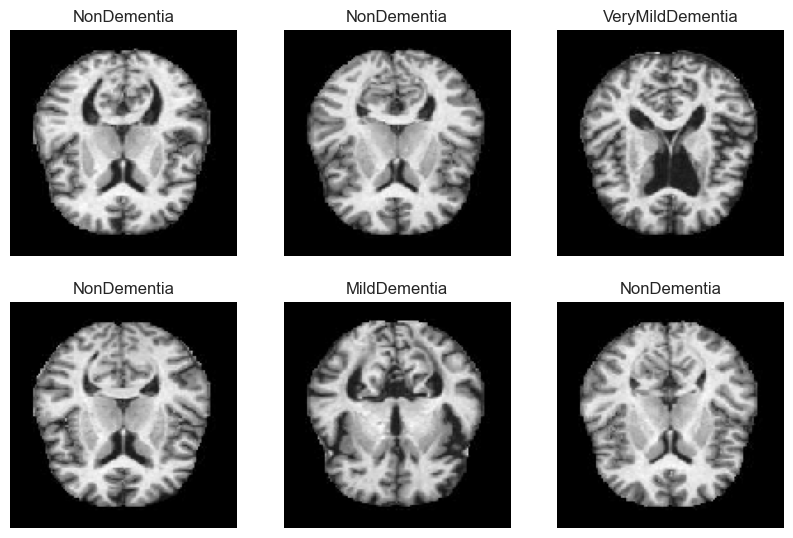

In [20]:
for mri_images, n_labels in validation_data:
    plt.figure(figsize=(10,10))
    for i in range(6):
        plt.subplot(330 + 1 + i)
        plt.imshow(mri_images[i])
        n_classes = validation_data.stage_classes[np.where(n_labels[i] == 1)[0][0]]
        plt.title(n_classes)
        plt.axis('off')
    plt.show()
    break

##### Augmented data

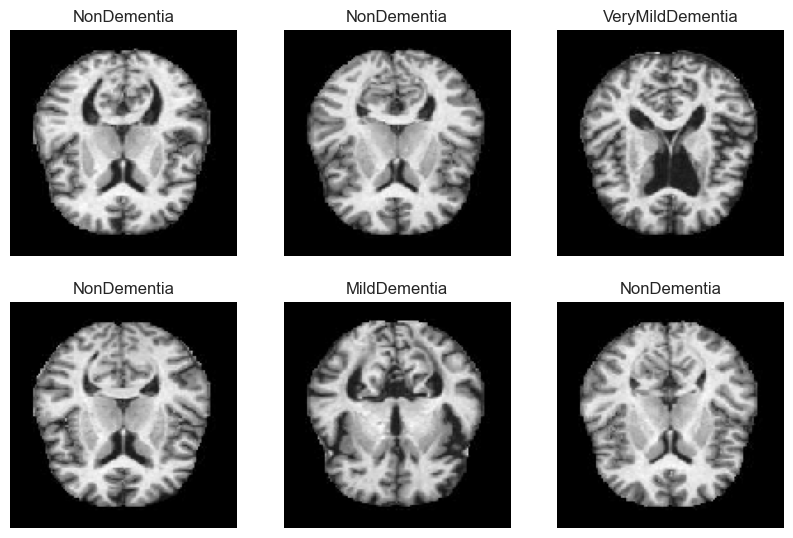

In [21]:
for mri_images, n_labels in validation_data_w_data_aug:
    plt.figure(figsize=(10,10))
    for i in range(6):
        plt.subplot(330 + 1 + i)
        plt.imshow(mri_images[i])
        n_classes = validation_data.stage_classes[np.where(n_labels[i] == 1)[0][0]]
        plt.title(n_classes)
        plt.axis('off')
    plt.show()
    break

#### Test dataset

##### Non-augmented data

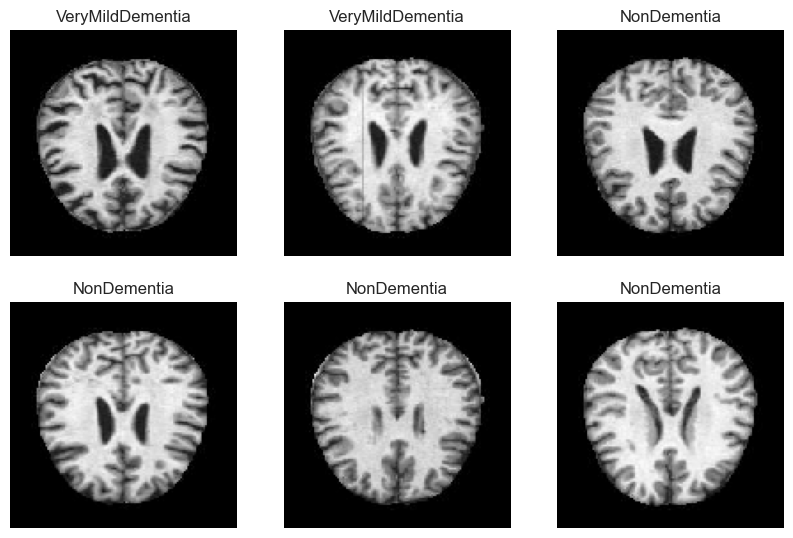

In [22]:
for mri_images, n_labels in test_data:
    plt.figure(figsize=(10,10))
    for i in range(6):
        plt.subplot(330 + 1 + i)
        plt.imshow(mri_images[i])
        n_classes = test_data.stage_classes[np.where(n_labels[i] == 1)[0][0]]
        plt.title(n_classes)
        plt.axis('off')
    plt.show()
    break

##### Augmented data

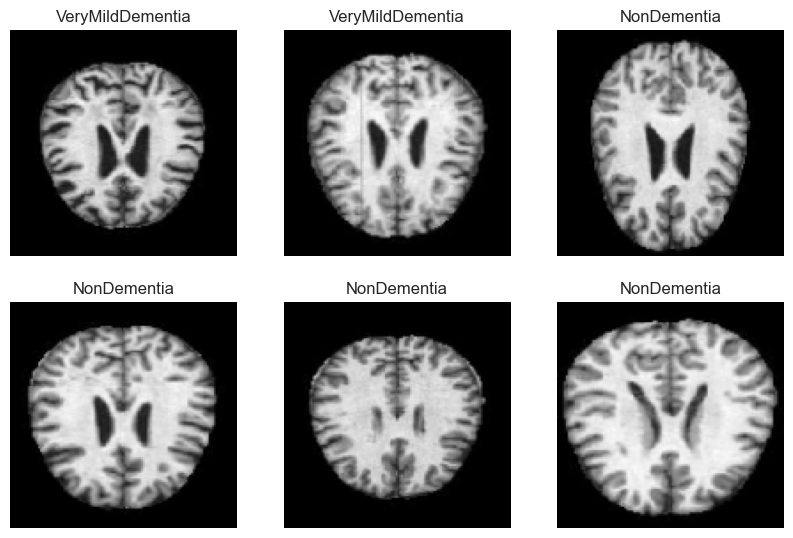

In [23]:
for mri_images, n_labels in test_data_w_data_aug:
    plt.figure(figsize=(10,10))
    for i in range(6):
        plt.subplot(330 + 1 + i)
        plt.imshow(mri_images[i])
        n_classes = test_data.stage_classes[np.where(n_labels[i] == 1)[0][0]]
        plt.title(n_classes)
        plt.axis('off')
    plt.show()
    break

## Compute class weight

In [24]:
class_weights = class_weight.compute_class_weight(
           class_weight = 'balanced',
           classes = np.unique(training_data.classes), 
            y=training_data.classes)
train_class_weights = dict(enumerate(class_weights))

In [25]:
class_weights_w_data_aug = class_weight.compute_class_weight(
           class_weight = 'balanced',
           classes = np.unique(training_data_w_data_aug.classes), 
            y=training_data_w_data_aug.classes)
train_class_weights_w_data_aug = dict(enumerate(class_weights_w_data_aug))

## Building the model

### Baseline model: InceptionV3 model + Transfer Learning

In [26]:
# Initialising the model with the parameters
inceptionV3_model = InceptionV3(input_shape=shape_image, 
                                include_top=False,
                                weights="imagenet",
                                pooling="max")

In [27]:
# Freezing the layers within the baseline model -> InceptionV3
for layers in inceptionV3_model.layers:
    layers.trainable=False

In [28]:
# Building the inception model using sequential API to arrange the Keras layers in a sequential order
dropout_val = 0.5

baseline_model=Sequential()
baseline_model.add(inceptionV3_model)
baseline_model.add(Dropout(dropout_val))
baseline_model.add(Flatten())
baseline_model.add(BatchNormalization())
baseline_model.add(Dense(64,kernel_initializer='he_uniform'))
baseline_model.add(BatchNormalization())
baseline_model.add(Activation('relu'))
baseline_model.add(Dropout(dropout_val))
baseline_model.add(Dense(32,kernel_initializer='he_uniform'))
baseline_model.add(BatchNormalization())
baseline_model.add(Activation('relu'))
baseline_model.add(Dropout(dropout_val))
baseline_model.add(Dense(32,kernel_initializer='he_uniform'))
baseline_model.add(BatchNormalization())
baseline_model.add(Activation('relu'))
baseline_model.add(Dense(4,activation='softmax'))

In [29]:
# Summary of InceptionV3 model
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_94 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 batch_normalization_95 (Bat  (None, 64)               256       
 chNormalization)                                       

#### Setting up the evaluation metrics for the model

In [30]:
# Calculating the f1 score of this specific model
def F1_score_metric(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_p = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_p = K.sum(K.round(K.clip(y_pred, 0, 1)))
    # Calculating the precision using the precision formula
    precision = tp / (predicted_p + K.epsilon())
    # Calculating the recall using recall formula
    recall = tp / (possible_p + K.epsilon())
    # Calculating the f1_score using precision and recall values computed
    f1_score_value = 2*(precision*recall)/(precision+recall+K.epsilon())
    # Returning f1_score
    return f1_score_value

In [31]:
# Setting a list of evaluation metrics in a list: eval_metrics
eval_metrics = [
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.AUC(name='auc'),
        F1_score_metric,
]

#### Improving learning process of the model using exponential decay function

In [32]:
def Exponen_Decay(lrs, sec):
    def Exponen_Decay_function(epochs):
        return lrs * 0.1 **(epochs / sec)
    return Exponen_Decay_function

Exponen_Decay_function = Exponen_Decay(0.01, 5) 

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(Exponen_Decay_function)

#### Defining the optimiser and the metrics for the model

In [33]:
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=eval_metrics)

#### Plotting Validation of the model - Using training and validation dataset

In [34]:
# plotting_train_vs_validation helper function to print 5 subplots containing history of accuracy, precision, f1-score, loss function and AUC
def plotting_train_vs_validation(accuary_score, validation_accuracy,
                                 loss_score, validation_loss_score,
                                 AUC, validation_AUC,
                                 precision_val, validation_precision_val,
                                 f1_score, validation_f1_score):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,10))
    fig.suptitle(" Evaluation metric visualation of the model ")
    
    # Plotting History of Accuracy score for evaluating the model
    ax1.plot(range(1, len(accuary_score) + 1), accuary_score)
    ax1.plot(range(1, len(validation_accuracy) + 1), validation_accuracy)
    ax1.set_title('History of Accuracy Score')
    ax1.set_xlabel('Epochs - number of iterations')
    ax1.set_ylabel('Accuracy Score')
    ax1.legend(['training data', 'validation data'])
    
    # Plotting History of Precision for evaluating the model
    ax2.plot(range(1, len(precision_val) + 1), precision_val)
    ax2.plot(range(1, len(validation_precision_val) + 1), validation_precision_val)
    ax2.set_title('History of Precision Value')
    ax2.set_xlabel('Epochs - number of iterations')
    ax2.set_ylabel('Precision')
    ax2.legend(['training data', 'validation data'])
    
    # Plotting History of F1-score for evaluating the model performance
    ax3.plot(range(1, len(f1_score) + 1), f1_score)
    ax3.plot(range(1, len(validation_f1_score) + 1), validation_f1_score)
    ax3.set_title('History of F1-score')
    ax3.set_xlabel('Epochs - number of iterations')
    ax3.set_ylabel('F1 score')
    ax3.legend(['training data', 'validation data'])
    
    # Plotting History of loss function for evaluating the model
    ax4.plot(range(1, len(loss_score) + 1), loss_score)
    ax4.plot(range(1, len(validation_loss_score) + 1), validation_loss_score)
    ax4.set_title('History of Loss function')
    ax4.set_xlabel('Epochs - number of iterations')
    ax4.set_ylabel('Loss score')
    ax4.legend(['training data', 'validation data'])
    
    # Plotting History of AUC for evaluating the model
    ax5.plot(range(1, len(AUC) + 1), AUC)
    ax5.plot(range(1, len(validation_AUC) + 1), validation_AUC)
    ax5.set_title('History of AUC(Area under a ROC curve)')
    ax5.set_xlabel('Epochs - number of iterations')
    ax5.set_ylabel('AUC')
    ax5.legend(['training data', 'validation data'])


    plt.show()

##### Non-augmented data

In [35]:
history=baseline_model.fit(training_data,
                  class_weight = train_class_weights,         
                  epochs = 50,
                  verbose = 1,
                  validation_data=validation_data,
                  callbacks=[
                             EarlyStopping(
                             monitor='val_auc',
                             patience=15,
                             restore_best_weights = True
                             )
                            ])

Epoch 1/50
145/145 [==============================] - 29s 171ms/step - loss: 1.5591 - precision: 0.3212 - recall: 0.0553 - accuracy: 0.7346 - auc: 0.5624 - F1_score_metric: 0.0916 - val_loss: 1.2962 - val_precision: 0.5510 - val_recall: 0.0528 - val_accuracy: 0.7524 - val_auc: 0.6295 - val_F1_score_metric: 0.0952
Epoch 2/50
145/145 [==============================] - 23s 158ms/step - loss: 1.3830 - precision: 0.3598 - recall: 0.0462 - accuracy: 0.7410 - auc: 0.5721 - F1_score_metric: 0.0802 - val_loss: 1.3394 - val_precision: 1.0000 - val_recall: 0.0078 - val_accuracy: 0.7520 - val_auc: 0.5878 - val_F1_score_metric: 0.0153
Epoch 3/50
145/145 [==============================] - 23s 158ms/step - loss: 1.3289 - precision: 0.3673 - recall: 0.0492 - accuracy: 0.7411 - auc: 0.5761 - F1_score_metric: 0.0848 - val_loss: 1.3678 - val_precision: 0.5714 - val_recall: 0.0078 - val_accuracy: 0.7505 - val_auc: 0.5528 - val_F1_score_metric: 0.0149
Epoch 4/50
145/145 [==============================] - 2

Epoch 27/50
145/145 [==============================] - 24s 169ms/step - loss: 0.8753 - precision: 0.5788 - recall: 0.2996 - accuracy: 0.7704 - auc: 0.7802 - F1_score_metric: 0.3938 - val_loss: 1.0395 - val_precision: 0.5938 - val_recall: 0.3346 - val_accuracy: 0.7764 - val_auc: 0.7818 - val_F1_score_metric: 0.4249
Epoch 28/50
145/145 [==============================] - 25s 170ms/step - loss: 0.9012 - precision: 0.5518 - recall: 0.2879 - accuracy: 0.7635 - auc: 0.7679 - F1_score_metric: 0.3776 - val_loss: 1.0625 - val_precision: 0.5836 - val_recall: 0.3209 - val_accuracy: 0.7730 - val_auc: 0.7759 - val_F1_score_metric: 0.4104
Epoch 29/50
145/145 [==============================] - 24s 167ms/step - loss: 0.9710 - precision: 0.5642 - recall: 0.2918 - accuracy: 0.7666 - auc: 0.7706 - F1_score_metric: 0.3838 - val_loss: 1.0924 - val_precision: 0.5684 - val_recall: 0.3170 - val_accuracy: 0.7691 - val_auc: 0.7628 - val_F1_score_metric: 0.4047
Epoch 30/50
145/145 [==============================]

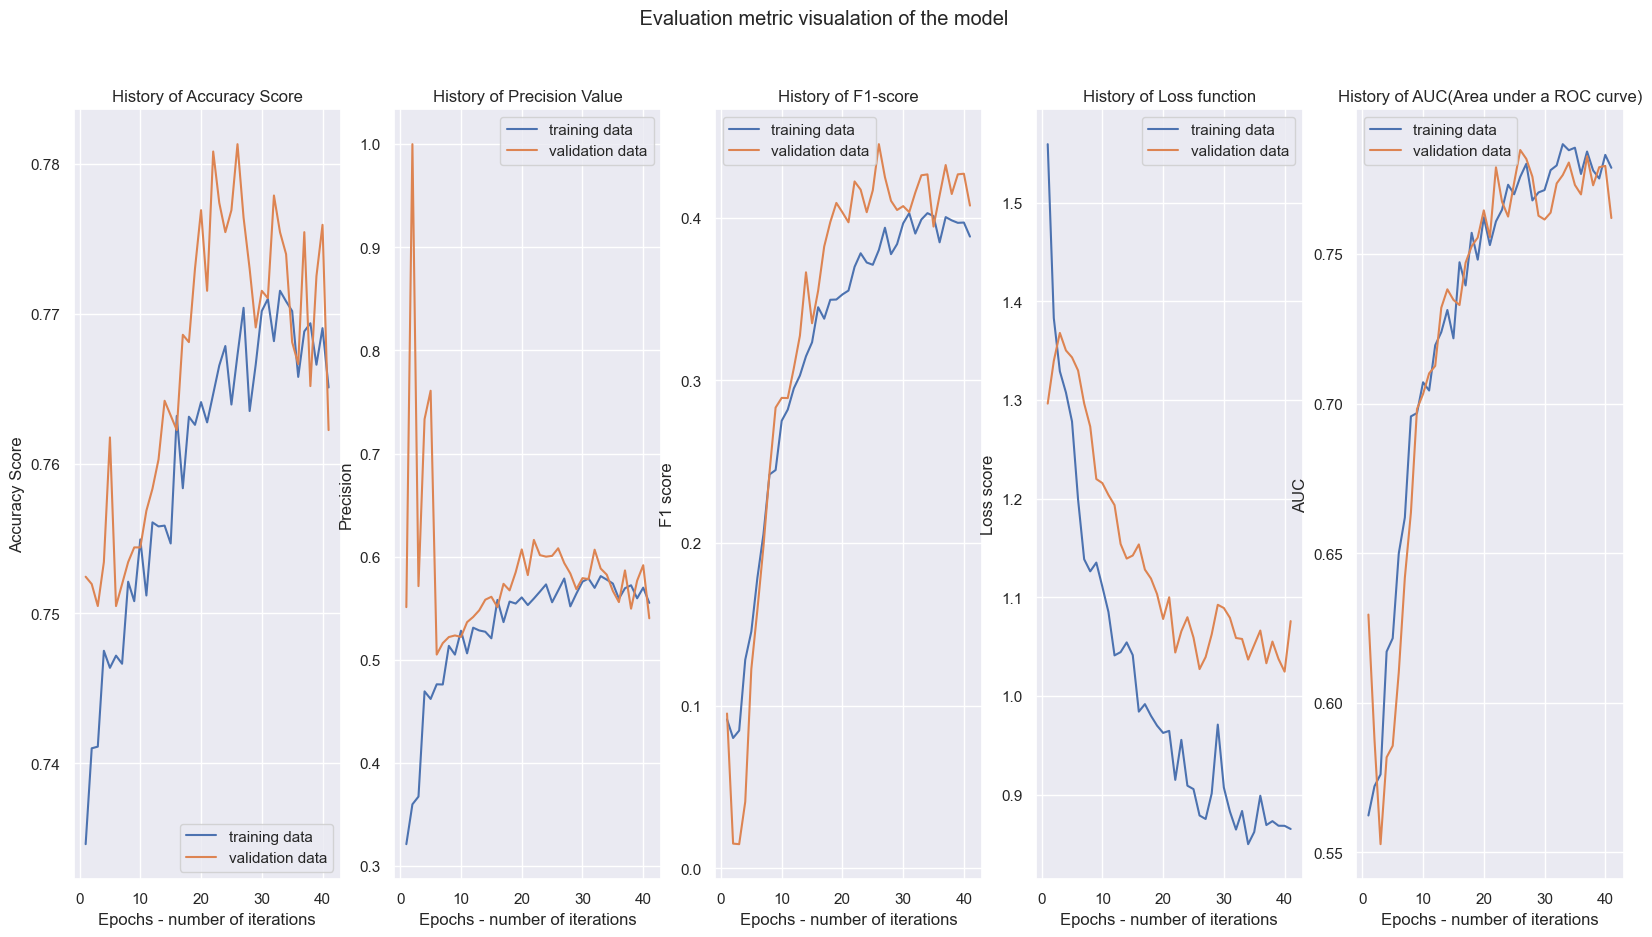

In [36]:
plotting_train_vs_validation(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['F1_score_metric'],history.history['val_F1_score_metric']
              )

##### Data Augmentation

In [37]:
history_w_data_aug=baseline_model.fit(training_data_w_data_aug,
                  class_weight = train_class_weights_w_data_aug,   
                  epochs = 50,
                  verbose = 1,
                  validation_data=validation_data_w_data_aug,
                  callbacks=[
                             EarlyStopping(
                             monitor='val_auc',
                             patience=15,
                             restore_best_weights = True
                             )
                            ])

Epoch 1/50
145/145 [==============================] - 29s 199ms/step - loss: 1.7744 - precision: 0.4202 - recall: 0.1679 - accuracy: 0.7341 - auc: 0.6693 - F1_score_metric: 0.2400 - val_loss: 1.0552 - val_precision: 0.6449 - val_recall: 0.2701 - val_accuracy: 0.7803 - val_auc: 0.7712 - val_F1_score_metric: 0.3795
Epoch 2/50
145/145 [==============================] - 32s 217ms/step - loss: 1.4032 - precision: 0.4751 - recall: 0.1221 - accuracy: 0.7468 - auc: 0.6669 - F1_score_metric: 0.1962 - val_loss: 1.1378 - val_precision: 0.6882 - val_recall: 0.2290 - val_accuracy: 0.7813 - val_auc: 0.7350 - val_F1_score_metric: 0.3384
Epoch 3/50
145/145 [==============================] - 32s 220ms/step - loss: 1.3533 - precision: 0.4444 - recall: 0.0946 - accuracy: 0.7441 - auc: 0.6413 - F1_score_metric: 0.1539 - val_loss: 1.1206 - val_precision: 0.6738 - val_recall: 0.2466 - val_accuracy: 0.7818 - val_auc: 0.7466 - val_F1_score_metric: 0.3553
Epoch 4/50
145/145 [==============================] - 3

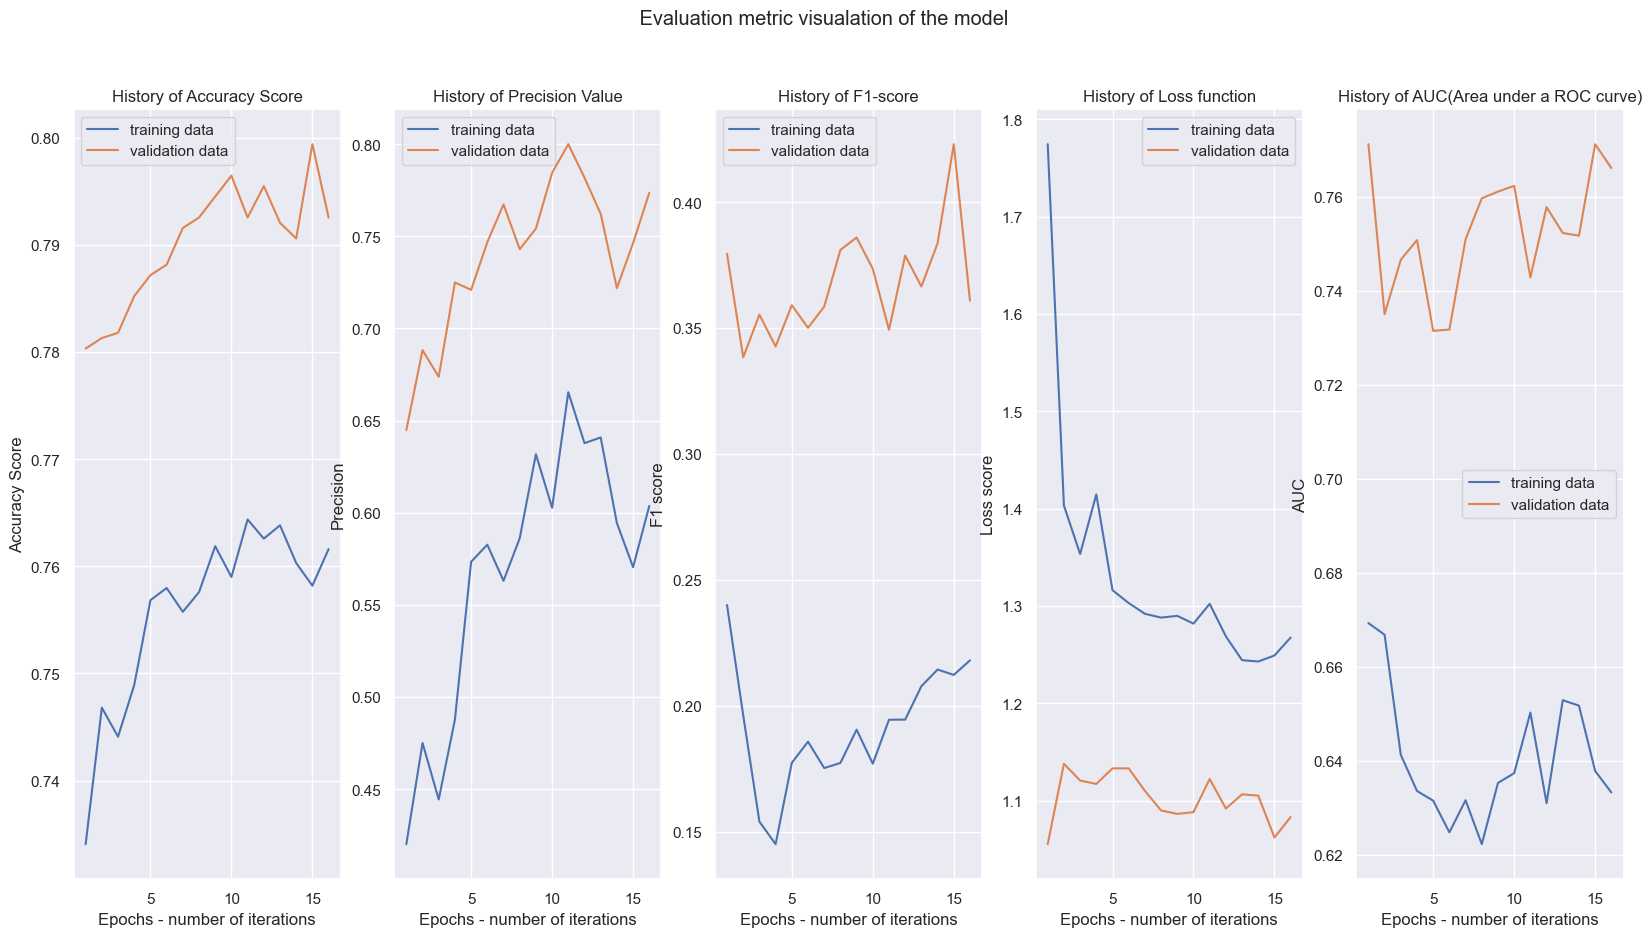

In [38]:
plotting_train_vs_validation(history_w_data_aug.history['accuracy'],history_w_data_aug.history['val_accuracy'],
               history_w_data_aug.history['loss'],history_w_data_aug.history['val_loss'],
               history_w_data_aug.history['auc'],history_w_data_aug.history['val_auc'],
               history_w_data_aug.history['precision'],history_w_data_aug.history['val_precision'],
               history_w_data_aug.history['F1_score_metric'],history_w_data_aug.history['val_F1_score_metric']
              )

#### Evaluating the model using test set

##### Non-augmented data

In [39]:
eval_scores = baseline_model.evaluate(test_data)

40/40 [==============================] - 7s 168ms/step - loss: 1.0387 - precision: 0.6243 - recall: 0.3260 - accuracy: 0.7824 - auc: 0.7942 - F1_score_metric: 0.4257


##### Augmented data

In [40]:
eval_scores_data_aug = baseline_model.evaluate(test_data_w_data_aug)

40/40 [==============================] - 8s 194ms/step - loss: 1.1566 - precision: 0.5360 - recall: 0.2737 - accuracy: 0.7592 - auc: 0.7402 - F1_score_metric: 0.3606


#### Printing evaluation scores

##### Non-augmented data

In [41]:
print("Accuracy Score = ", eval_scores[3])
print("Precision Value = ", eval_scores[1])
print("Recall Value = ", eval_scores[2])
print("AUC = ", eval_scores[4])
print("F1 Score = ", eval_scores[5])

Accuracy Score =  0.7824472188949585
Precision Value =  0.6242514848709106
Recall Value =  0.3260359764099121
AUC =  0.7941595315933228
F1 Score =  0.42571744322776794


##### Augmented data

In [42]:
print("Accuracy Score = ", eval_scores_data_aug[3])
print("Precision Value = ", eval_scores_data_aug[1])
print("Recall Value = ", eval_scores_data_aug[2])
print("AUC = ", eval_scores_data_aug[4])
print("F1 Score = ", eval_scores_data_aug[5])

Accuracy Score =  0.759186863899231
Precision Value =  0.5359877347946167
Recall Value =  0.2736513018608093
AUC =  0.7402100563049316
F1 Score =  0.36060017347335815


### Conclusion with regards to the baseline model

Initially, during the literature review stage, it had stated that data augmentation would improve the performance of models. However, when experimenting between non-augmented and augmented data, data with minimal to no augmentation performed had better performance. Hence, for the remaining models, non-augmented data will be used. 

### Model A: MobileNetV2 + CNN layers + Transfer Learning

In [43]:
# Initialising the model with the parameters
mobilenet_model = MobileNetV2(input_shape=(shape_image), 
                                include_top=False,
                                weights="imagenet")

In [44]:
# Freezing the layers within the baseline model -> InceptionV3
for layers in mobilenet_model.layers:
    layers.trainable=False

In [45]:
# Building the mobilenet model with convolutional layers using sequential API to arrange the Keras layers in a sequential order
model2 = tf.keras.Sequential([
  mobilenet_model,
  tf.keras.layers.Conv2D(128, 3, activation='relu', input_shape = shape_image),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(class_num, activation='softmax')
])

In [46]:
# Summary of the model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_94 (Conv2D)          (None, 2, 2, 128)         1474688   
                                                                 
 global_average_pooling2d (G  (None, 128)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3,733,188
Trainable params: 1,475,204
No

In [47]:
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=eval_metrics)

In [48]:
history2=model2.fit(training_data,
                  class_weight = train_class_weights,
                  epochs = 50,
                  verbose = 1,
                  validation_data=validation_data,
                  callbacks=[
                             EarlyStopping(
                             monitor='val_auc',
                             patience=15,
                             restore_best_weights = True
                             )
                            ])

Epoch 1/50
145/145 [==============================] - 25s 160ms/step - loss: 2.6151 - precision: 0.5107 - recall: 0.1413 - accuracy: 0.7515 - auc: 0.6741 - F1_score_metric: 0.1483 - val_loss: 1.3332 - val_precision: 1.0000 - val_recall: 0.0098 - val_accuracy: 0.7524 - val_auc: 0.5499 - val_F1_score_metric: 0.0187
Epoch 2/50
145/145 [==============================] - 22s 155ms/step - loss: 1.2469 - precision: 0.7455 - recall: 0.1989 - accuracy: 0.7828 - auc: 0.7376 - F1_score_metric: 0.3014 - val_loss: 1.3103 - val_precision: 0.9286 - val_recall: 0.0254 - val_accuracy: 0.7559 - val_auc: 0.5861 - val_F1_score_metric: 0.0485
Epoch 3/50
145/145 [==============================] - 22s 151ms/step - loss: 1.1096 - precision: 0.6824 - recall: 0.2256 - accuracy: 0.7802 - auc: 0.7357 - F1_score_metric: 0.3256 - val_loss: 1.1269 - val_precision: 0.7462 - val_recall: 0.1898 - val_accuracy: 0.7813 - val_auc: 0.7560 - val_F1_score_metric: 0.3003
Epoch 4/50
145/145 [==============================] - 2

Epoch 27/50
145/145 [==============================] - 22s 151ms/step - loss: 0.6811 - precision: 0.6489 - recall: 0.5529 - accuracy: 0.8134 - auc: 0.8771 - F1_score_metric: 0.5956 - val_loss: 0.8353 - val_precision: 0.6326 - val_recall: 0.5323 - val_accuracy: 0.8058 - val_auc: 0.8619 - val_F1_score_metric: 0.5776
Epoch 28/50
145/145 [==============================] - 22s 149ms/step - loss: 0.6237 - precision: 0.6561 - recall: 0.5729 - accuracy: 0.8182 - auc: 0.8830 - F1_score_metric: 0.6099 - val_loss: 0.8089 - val_precision: 0.6435 - val_recall: 0.5793 - val_accuracy: 0.8146 - val_auc: 0.8767 - val_F1_score_metric: 0.6089
Epoch 29/50
145/145 [==============================] - 21s 147ms/step - loss: 0.7046 - precision: 0.6429 - recall: 0.5425 - accuracy: 0.8103 - auc: 0.8687 - F1_score_metric: 0.5873 - val_loss: 0.9097 - val_precision: 0.5730 - val_recall: 0.4070 - val_accuracy: 0.7759 - val_auc: 0.8267 - val_F1_score_metric: 0.4755
Epoch 30/50
145/145 [==============================]

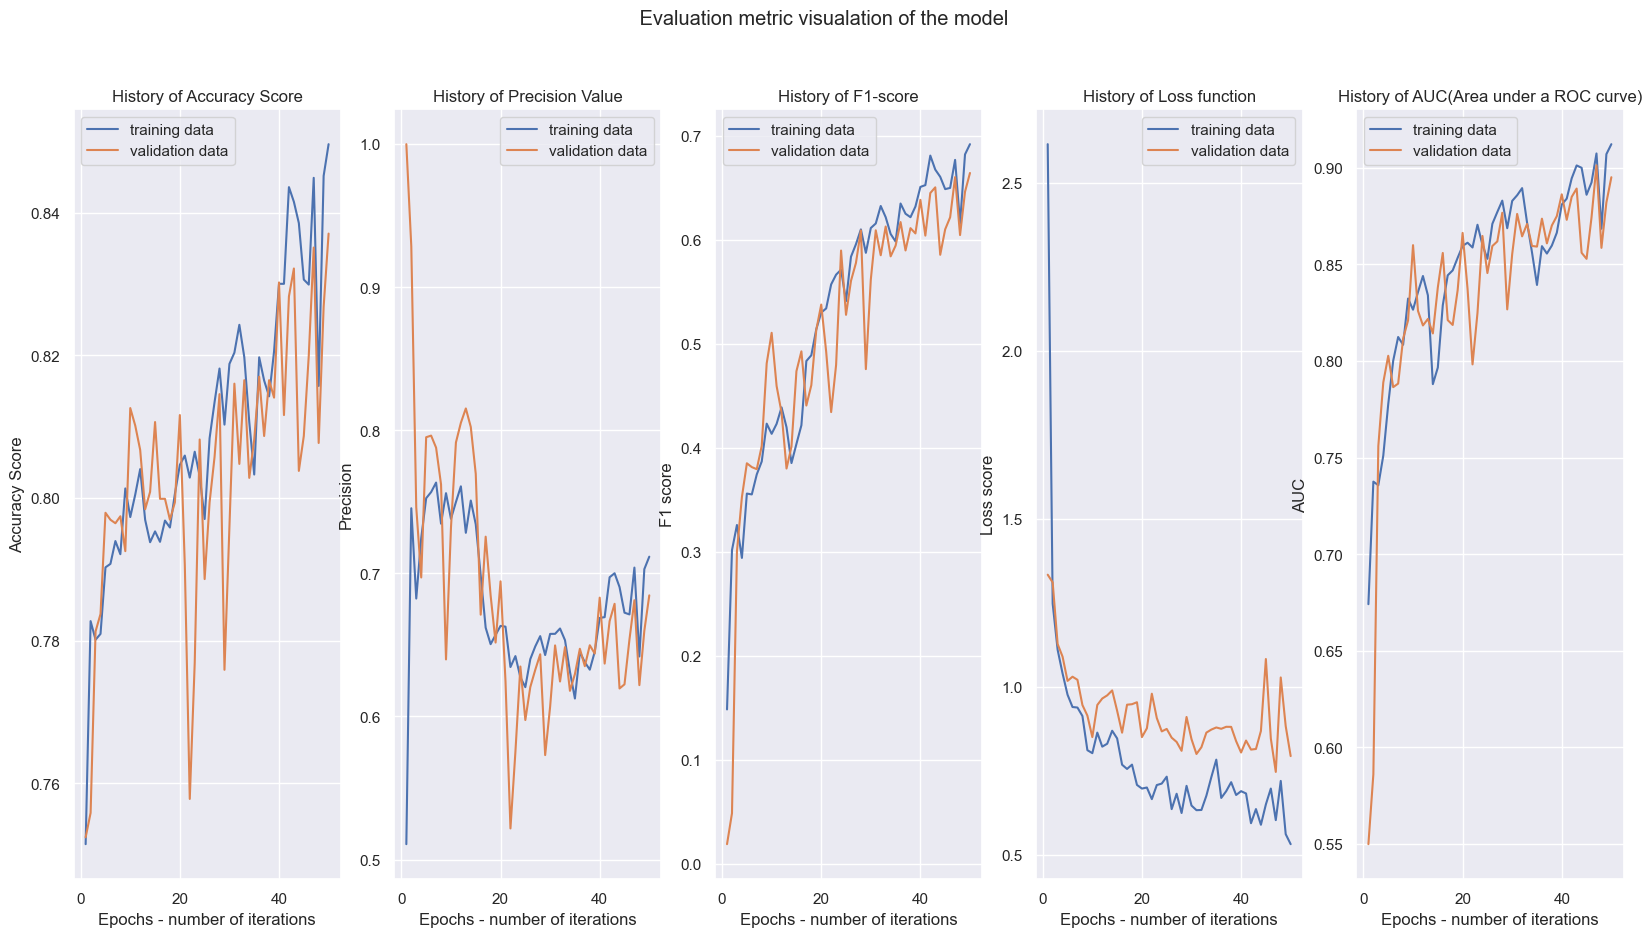

In [49]:
plotting_train_vs_validation(history2.history['accuracy'],history2.history['val_accuracy'],
               history2.history['loss'],history2.history['val_loss'],
               history2.history['auc'],history2.history['val_auc'],
               history2.history['precision'],history2.history['val_precision'],
               history2.history['F1_score_metric'],history2.history['val_F1_score_metric']
              )

In [50]:
eval_scores_2 = model2.evaluate(test_data)

40/40 [==============================] - 4s 107ms/step - loss: 1.5827 - precision: 0.6066 - recall: 0.5895 - accuracy: 0.8018 - auc: 0.8441 - F1_score_metric: 0.5975


In [51]:
print("Accuracy Score = ", eval_scores_2[3])
print("Precision Value = ", eval_scores_2[1])
print("Recall Value = ", eval_scores_2[2])
print("AUC = ", eval_scores_2[4])
print("F1 Score = ", eval_scores_2[5])

Accuracy Score =  0.8017982840538025
Precision Value =  0.6065969467163086
Recall Value =  0.5895230770111084
AUC =  0.844105064868927
F1 Score =  0.5975371599197388


### Model B: DenseNet 121 + CNN layers + Transfer Learning

In [52]:
# Initialising the model with the parameters
densenet_model = DenseNet121(input_shape=shape_image, 
                                include_top=False,
                                weights="imagenet")

In [53]:
# Freezing the layers within the baseline model -> InceptionV3
for layers in densenet_model.layers:
    layers.trainable=False

In [54]:
# Building the inception model using sequential API to arrange the Keras layers in a sequential order
model3 = tf.keras.Sequential([
  densenet_model,
  tf.keras.layers.Conv2D(128, 3, activation='relu', input_shape = shape_image),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(class_num, activation='softmax')
])

In [55]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 conv2d_95 (Conv2D)          (None, 2, 2, 128)         1179776   
                                                                 
 dropout_4 (Dropout)         (None, 2, 2, 128)         0         
                                                                 
 global_average_pooling2d_1   (None, 128)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 8,217,796
Trainable params: 1,180,292
Non-trainable params: 7,037,504
____________________________________

In [56]:
model3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=eval_metrics)

In [57]:
history3=model3.fit(training_data,
                  class_weight = train_class_weights,
                  epochs = 50,
                  verbose = 1,
                  validation_data=validation_data,
                  callbacks=[
                             EarlyStopping(
                             monitor='val_auc',
                             patience=15,
                             restore_best_weights = True
                             )
                            ])

Epoch 1/50
145/145 [==============================] - 85s 554ms/step - loss: 2.2067 - precision: 0.4911 - recall: 0.2914 - accuracy: 0.7474 - auc: 0.6892 - F1_score_metric: 0.2674 - val_loss: 1.1972 - val_precision: 0.6890 - val_recall: 0.2211 - val_accuracy: 0.7803 - val_auc: 0.6890 - val_F1_score_metric: 0.3277
Epoch 2/50
145/145 [==============================] - 76s 524ms/step - loss: 1.1728 - precision: 0.6483 - recall: 0.2167 - accuracy: 0.7748 - auc: 0.7401 - F1_score_metric: 0.3114 - val_loss: 1.2104 - val_precision: 0.6380 - val_recall: 0.2759 - val_accuracy: 0.7798 - val_auc: 0.6957 - val_F1_score_metric: 0.3810
Epoch 3/50
145/145 [==============================] - 77s 531ms/step - loss: 1.2747 - precision: 0.6852 - recall: 0.1633 - accuracy: 0.7721 - auc: 0.6289 - F1_score_metric: 0.2402 - val_loss: 1.4832 - val_precision: 0.1667 - val_recall: 0.0078 - val_accuracy: 0.7422 - val_auc: 0.3529 - val_F1_score_metric: 0.0147
Epoch 4/50
145/145 [==============================] - 7

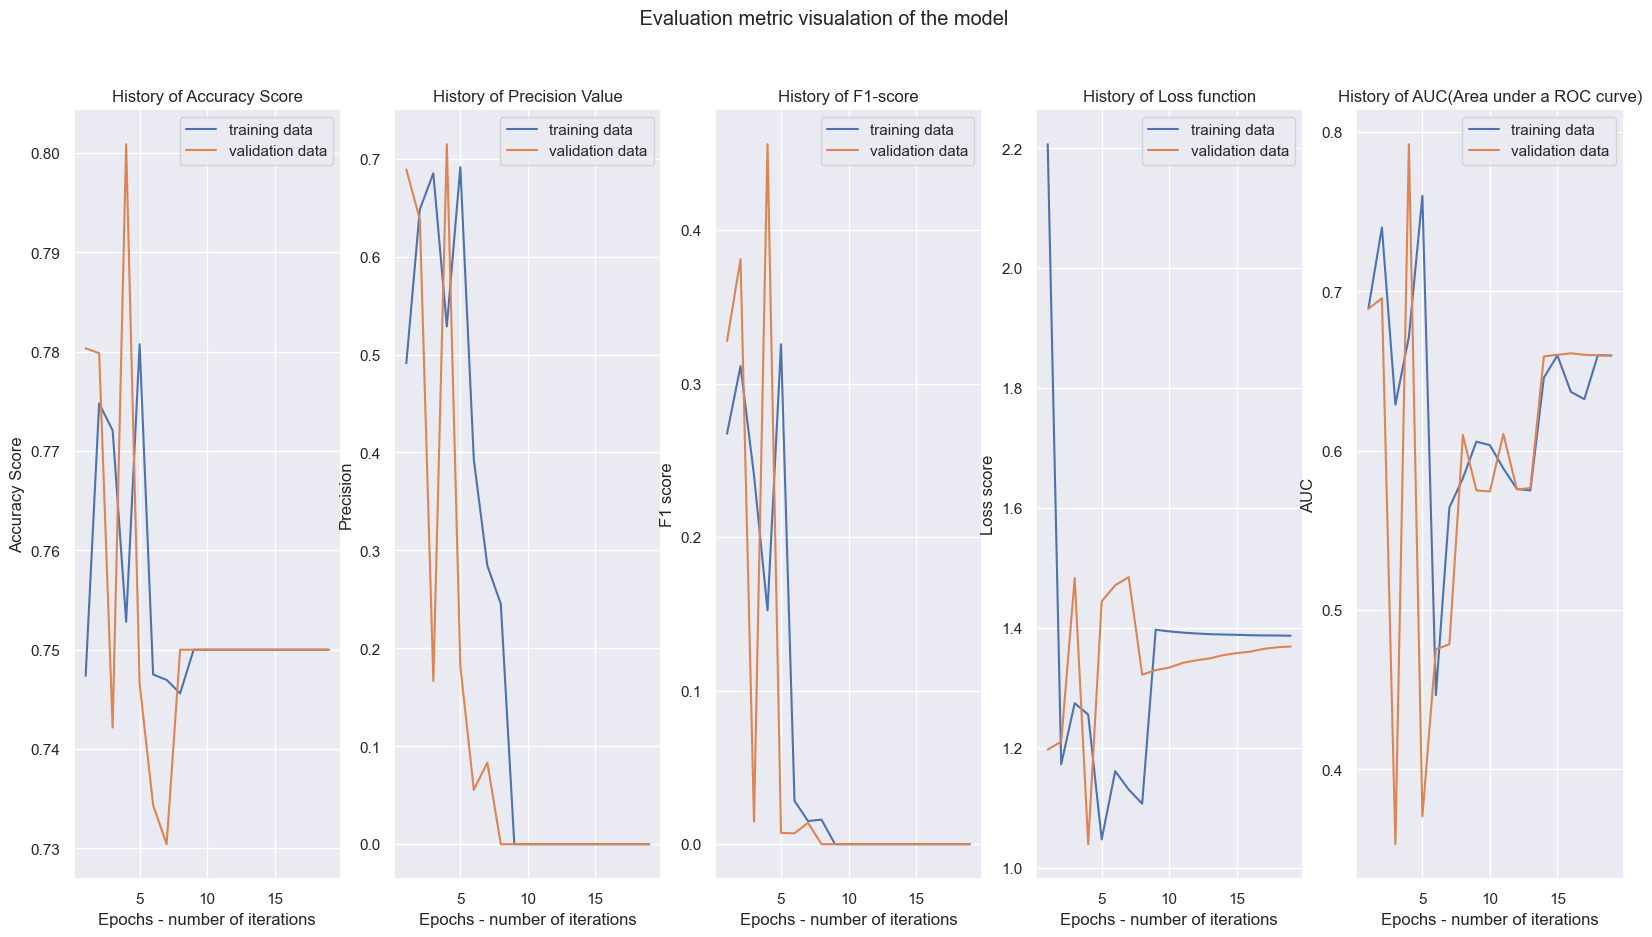

In [58]:
plotting_train_vs_validation(history3.history['accuracy'],history3.history['val_accuracy'],
               history3.history['loss'],history3.history['val_loss'],
               history3.history['auc'],history3.history['val_auc'],
               history3.history['precision'],history3.history['val_precision'],
               history3.history['F1_score_metric'],history3.history['val_F1_score_metric']
              )

In [59]:
eval_scores_3 = model3.evaluate(test_data)

40/40 [==============================] - 18s 458ms/step - loss: 1.5084 - precision: 0.2145 - recall: 0.0555 - accuracy: 0.7131 - auc: 0.5069 - F1_score_metric: 0.0864


In [60]:
print("Accuracy Score = ", eval_scores_3[3])
print("Precision Value = ", eval_scores_3[1])
print("Recall Value = ", eval_scores_3[2])
print("AUC = ", eval_scores_3[4])
print("F1 Score = ", eval_scores_3[5])

Accuracy Score =  0.7130571007728577
Precision Value =  0.2145015150308609
Recall Value =  0.055512119084596634
AUC =  0.5068990588188171
F1 Score =  0.08640348166227341


### Model C: VGG16 + CNN layers + Transfer Learning

In [61]:
# Initialising the model with the parameters
vgg16_model = VGG16(weights = 'imagenet', input_shape = shape_image, include_top = False)

In [62]:
# Freezing the layers within the model -> VGG16
for layers in vgg16_model.layers:
    layers.trainable=False

In [63]:
# Building the VGG16 model using sequential API to arrange the Keras layers in a sequential order
model4 = tf.keras.Sequential([
  vgg16_model,
  tf.keras.layers.Conv2D(128, 3, activation='relu', input_shape = shape_image),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(class_num, activation='softmax')
])

In [64]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 conv2d_96 (Conv2D)          (None, 2, 2, 128)         589952    
                                                                 
 dropout_5 (Dropout)         (None, 2, 2, 128)         0         
                                                                 
 global_average_pooling2d_2   (None, 128)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 4)                 516       
                                                                 
Total params: 15,305,156
Trainable params: 590,468
Non-trainable params: 14,714,688
____________________________________

In [65]:
model4.compile(optimizer='adam', loss='categorical_crossentropy',metrics=eval_metrics)

In [66]:
history4=model4.fit(training_data,
                  class_weight = train_class_weights,
                  epochs = 50,
                  verbose = 1,
                  validation_data=validation_data,
                  callbacks=[
                             EarlyStopping(
                             monitor='val_auc',
                             patience=2,
                             restore_best_weights = True
                             )
                            ],
                 )

Epoch 1/50
145/145 [==============================] - 102s 696ms/step - loss: 1.3048 - precision: 0.4449 - recall: 0.1194 - accuracy: 0.7426 - auc: 0.6484 - F1_score_metric: 0.2053 - val_loss: 1.2621 - val_precision: 0.8370 - val_recall: 0.1507 - val_accuracy: 0.7803 - val_auc: 0.6690 - val_F1_score_metric: 0.2528
Epoch 2/50
145/145 [==============================] - 103s 707ms/step - loss: 1.1067 - precision: 0.6774 - recall: 0.2427 - accuracy: 0.7818 - auc: 0.7535 - F1_score_metric: 0.3450 - val_loss: 1.1202 - val_precision: 0.6773 - val_recall: 0.2916 - val_accuracy: 0.7882 - val_auc: 0.7550 - val_F1_score_metric: 0.4047
Epoch 3/50
145/145 [==============================] - 100s 691ms/step - loss: 0.9198 - precision: 0.6498 - recall: 0.3369 - accuracy: 0.7888 - auc: 0.8016 - F1_score_metric: 0.4378 - val_loss: 1.1466 - val_precision: 0.5086 - val_recall: 0.2309 - val_accuracy: 0.7520 - val_auc: 0.7328 - val_F1_score_metric: 0.3144
Epoch 4/50
145/145 [==============================] 

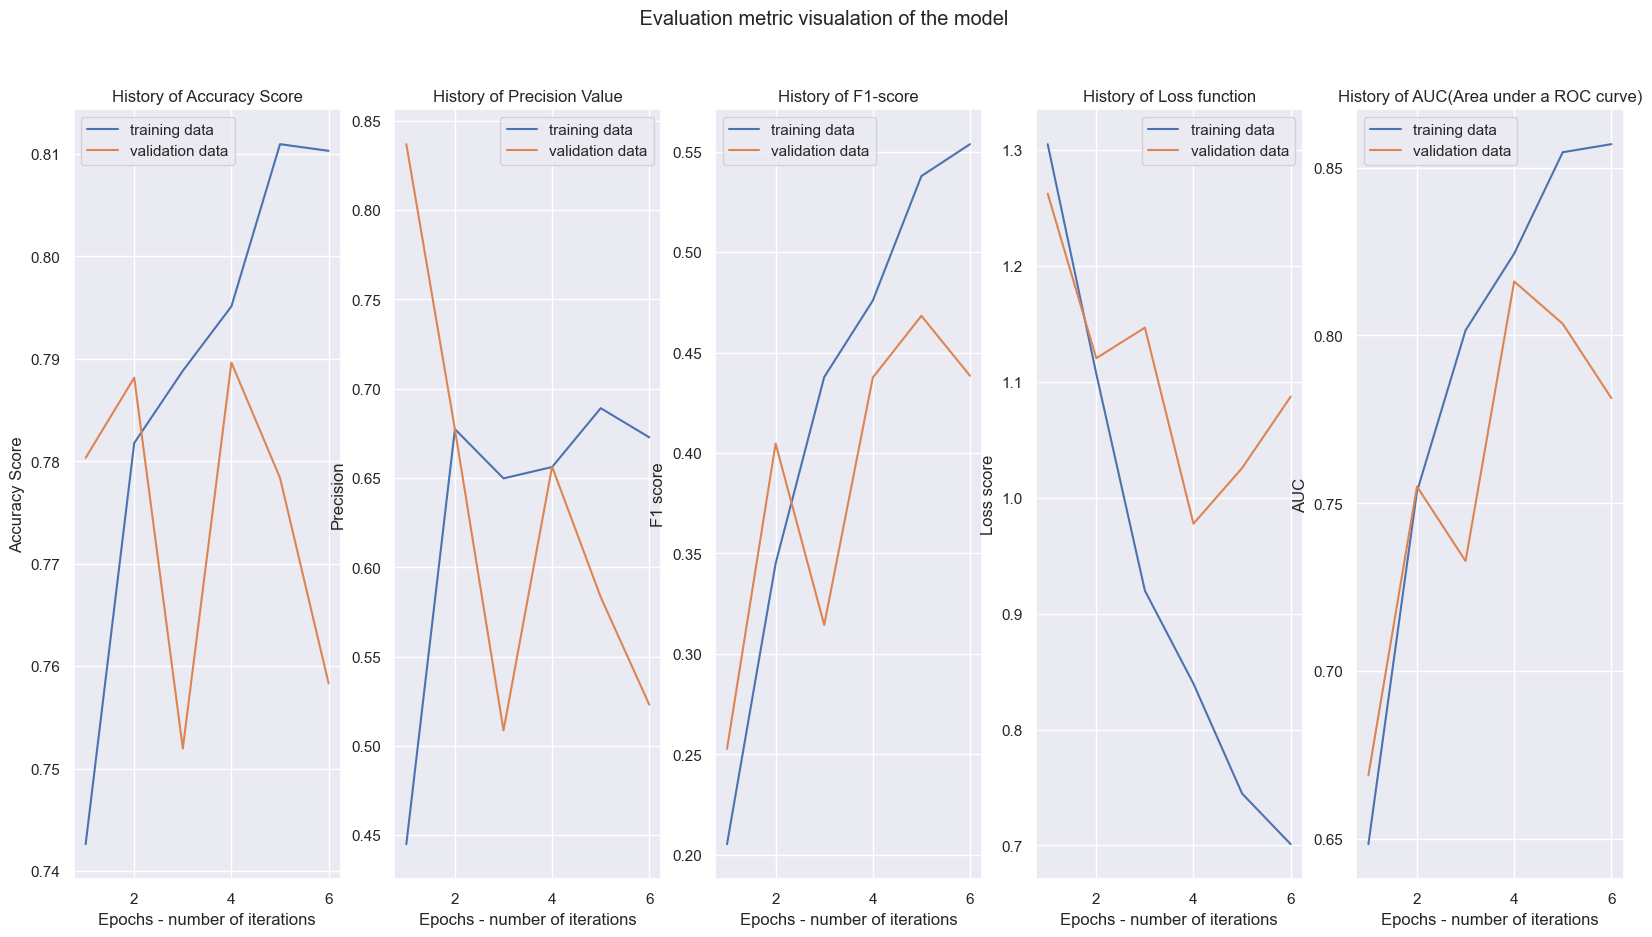

In [67]:
plotting_train_vs_validation(history4.history['accuracy'],history4.history['val_accuracy'],
               history4.history['loss'],history4.history['val_loss'],
               history4.history['auc'],history4.history['val_auc'],
               history4.history['precision'],history4.history['val_precision'],
               history4.history['F1_score_metric'],history4.history['val_F1_score_metric']
              )

In [68]:
eval_scores_4 = model4.evaluate(test_data)

40/40 [==============================] - 25s 615ms/step - loss: 0.9202 - precision: 0.6518 - recall: 0.4113 - accuracy: 0.7979 - auc: 0.8439 - F1_score_metric: 0.5025


In [69]:
print("Accuracy Score = ", eval_scores_4[3])
print("Precision Value = ", eval_scores_4[1])
print("Recall Value = ", eval_scores_4[2])
print("AUC = ", eval_scores_4[4])
print("F1 Score = ", eval_scores_4[5])

Accuracy Score =  0.797888994216919
Precision Value =  0.6517967581748962
Recall Value =  0.4112587869167328
AUC =  0.8439229130744934
F1 Score =  0.5025182962417603


### Model D: VGG19 + CNN layers + Transfer Learning

In [70]:
# Initialising the model with the parameters
vgg19_model = VGG19(weights = 'imagenet', input_shape = shape_image, include_top = False)

In [71]:
# Freezing the layers within the baseline model -> VGG19
for layers in vgg19_model.layers:
    layers.trainable=False

In [72]:
# Building the VGG19 model using sequential API to arrange the Keras layers in a sequential order
model5 = tf.keras.Sequential([
  vgg19_model,
  tf.keras.layers.Conv2D(128, 3, activation='relu', input_shape = shape_image),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(class_num, activation='softmax')
])

In [73]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 conv2d_97 (Conv2D)          (None, 2, 2, 128)         589952    
                                                                 
 dropout_6 (Dropout)         (None, 2, 2, 128)         0         
                                                                 
 global_average_pooling2d_3   (None, 128)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 4)                 516       
                                                                 
Total params: 20,614,852
Trainable params: 590,468
Non-trainable params: 20,024,384
____________________________________

In [74]:
model5.compile(optimizer='adam', loss='categorical_crossentropy',metrics=eval_metrics)

In [75]:
history5=model5.fit(training_data,
                  class_weight = train_class_weights,
                  epochs = 50,
                  verbose = 1,
                  validation_data=validation_data,
                  callbacks=[
                             EarlyStopping(
                             monitor='val_auc',
                             patience=2,
                             restore_best_weights = True
                             )
                            ],
                 )

Epoch 1/50
145/145 [==============================] - 127s 868ms/step - loss: 1.4032 - precision: 0.5274 - recall: 0.1488 - accuracy: 0.7539 - auc: 0.6976 - F1_score_metric: 0.1194 - val_loss: 1.3442 - val_precision: 0.8333 - val_recall: 0.0685 - val_accuracy: 0.7637 - val_auc: 0.5998 - val_F1_score_metric: 0.1234
Epoch 2/50
145/145 [==============================] - 125s 863ms/step - loss: 1.1960 - precision: 0.7258 - recall: 0.1803 - accuracy: 0.7780 - auc: 0.7268 - F1_score_metric: 0.2807 - val_loss: 1.0655 - val_precision: 0.7674 - val_recall: 0.2583 - val_accuracy: 0.7950 - val_auc: 0.7847 - val_F1_score_metric: 0.3811
Epoch 3/50
145/145 [==============================] - 125s 863ms/step - loss: 1.1234 - precision: 0.7382 - recall: 0.2239 - accuracy: 0.7861 - auc: 0.7581 - F1_score_metric: 0.3324 - val_loss: 1.0663 - val_precision: 0.7661 - val_recall: 0.2564 - val_accuracy: 0.7945 - val_auc: 0.7865 - val_F1_score_metric: 0.3807
Epoch 4/50
145/145 [==============================] 

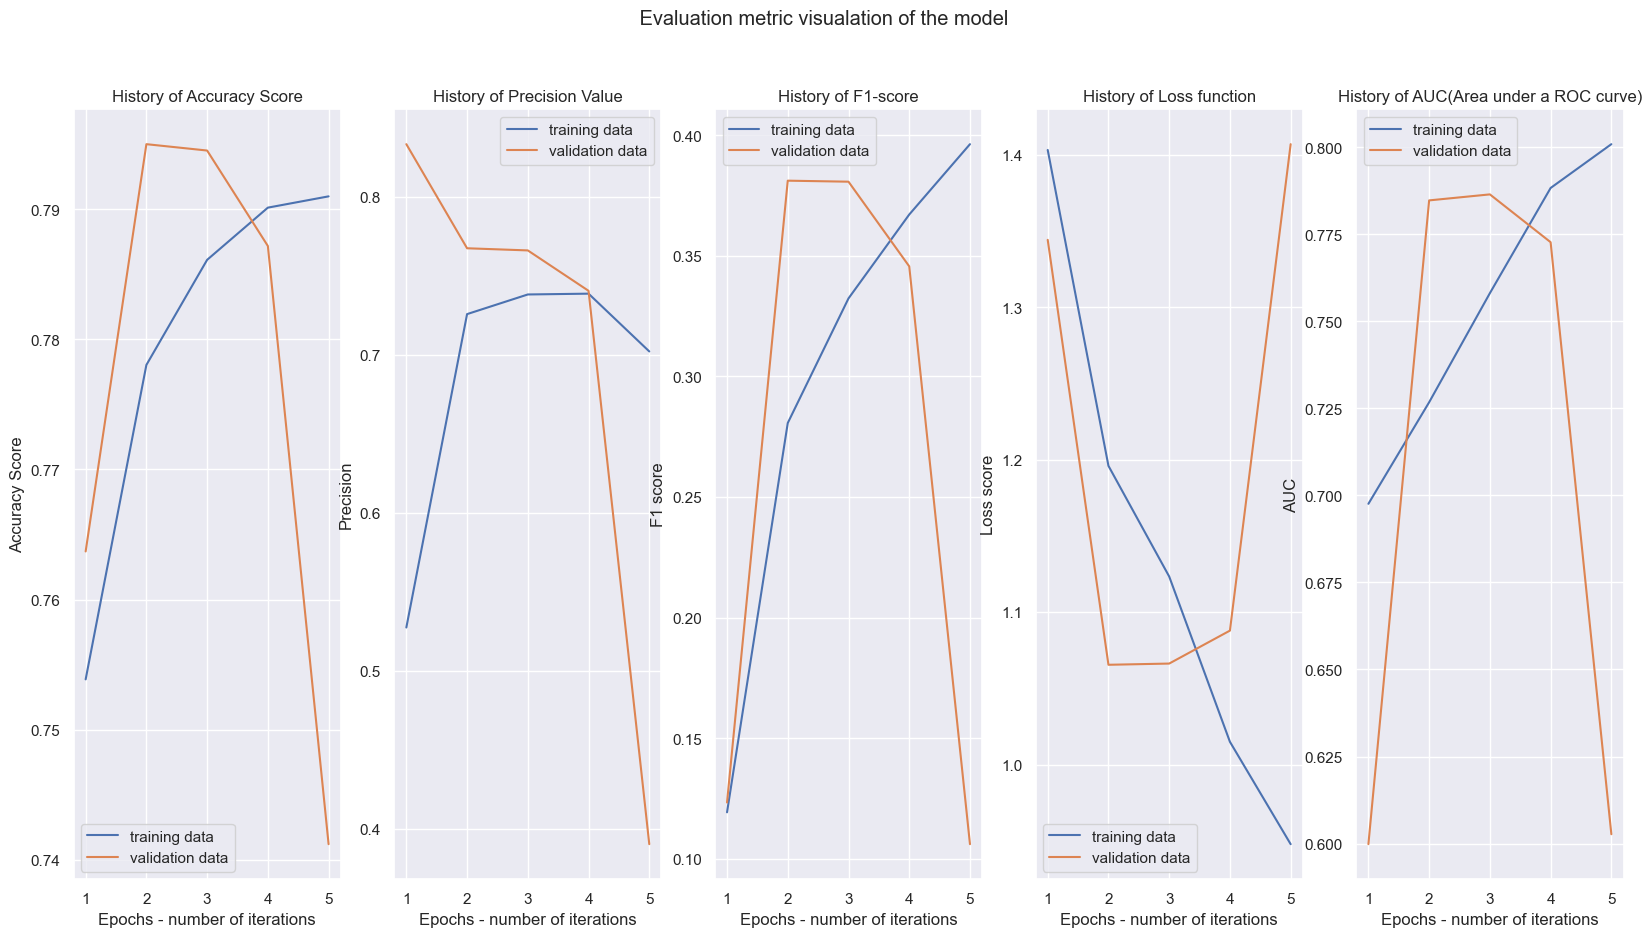

In [76]:
plotting_train_vs_validation(history5.history['accuracy'],history5.history['val_accuracy'],
               history5.history['loss'],history5.history['val_loss'],
               history5.history['auc'],history5.history['val_auc'],
               history5.history['precision'],history5.history['val_precision'],
               history5.history['F1_score_metric'],history5.history['val_F1_score_metric']
              )

In [77]:
eval_scores_5 = model5.evaluate(test_data)

40/40 [==============================] - 29s 731ms/step - loss: 0.9861 - precision: 0.7610 - recall: 0.2713 - accuracy: 0.7965 - auc: 0.8275 - F1_score_metric: 0.3962


In [78]:
print("Accuracy Score = ", eval_scores_5[3])
print("Precision Value = ", eval_scores_5[1])
print("Recall Value = ", eval_scores_5[2])
print("AUC = ", eval_scores_5[4])
print("F1 Score = ", eval_scores_5[5])

Accuracy Score =  0.7965207099914551
Precision Value =  0.7609649300575256
Recall Value =  0.27130571007728577
AUC =  0.8274626731872559
F1 Score =  0.39619946479797363


### Model E: VGG16 + MobileNetV2 + Custom Model

In [80]:
input_layer = Input(shape=shape_image, name="Input_X")

# Conv model A
al_1 = Conv2D(8, (3, 3), activation='relu')(input_layer)
al_2 = Flatten()(al_1)

# Conv model B
bl_1 = Conv2D(16, (3, 3), activation='relu')(input_layer)
bl_2 = Flatten()(bl_1)

# Model C: VGG16
x_vgg = tf.keras.applications.vgg16.preprocess_input(input_layer)
vgg_tfl = VGG16(weights='imagenet', include_top=False)
vgg_tfl.trainable = False
vgg = vgg_tfl(x_vgg)
vgg = Flatten()(vgg)

# Model D: MobileNetV2
x_mobilenet = tf.keras.applications.mobilenet.preprocess_input(input_layer)
mobilenet_tfl = MobileNetV2(weights='imagenet', include_top=False)
mobilenet_tfl.trainable = False
mobile = mobilenet_tfl(x_mobilenet)
mobile = Flatten()(mobile)

#Merging model A and B
a_b_c = concatenate([al_2,bl_2,vgg, mobile],name="concatenated_layer")

#Final Layer
output_layer = Dense(class_num, activation = "softmax", name = "output_layer")(a_b_c)

#Model Definition 
merged = Model(inputs=[input_layer],outputs=[output_layer])

In [81]:
merged.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_X (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.__operators__.getitem_1 (Sl  (None, 128, 128, 3)  0          ['Input_X[0][0]']                
 icingOpLambda)                                                                                   
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 128, 128, 3)  0           ['Input_X[0][0]']                
                                                                                              

In [82]:
merged.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=eval_metrics)

In [84]:
history6=merged.fit(training_data,
                  class_weight = train_class_weights,
                  epochs = 50,
                  verbose = 1,
                  validation_data=validation_data,
                  callbacks=[
                             EarlyStopping(
                             monitor='val_auc',
                             patience=15,
                             restore_best_weights = True
                             )
                            ],
                 )

Epoch 1/50
145/145 [==============================] - 121s 833ms/step - loss: 2.0111 - precision: 0.4294 - recall: 0.3887 - accuracy: 0.7181 - auc: 0.6727 - F1_score_metric: 0.4101 - val_loss: 1.3366 - val_precision: 0.3456 - val_recall: 0.3131 - val_accuracy: 0.6800 - val_auc: 0.7237 - val_F1_score_metric: 0.3284
Epoch 2/50
145/145 [==============================] - 125s 866ms/step - loss: 0.9247 - precision: 0.6347 - recall: 0.6050 - accuracy: 0.8142 - auc: 0.8509 - F1_score_metric: 0.6230 - val_loss: 0.8941 - val_precision: 0.6093 - val_recall: 0.5401 - val_accuracy: 0.7984 - val_auc: 0.8620 - val_F1_score_metric: 0.5699
Epoch 3/50
145/145 [==============================] - 125s 860ms/step - loss: 0.4412 - precision: 0.8012 - recall: 0.7809 - accuracy: 0.8968 - auc: 0.9432 - F1_score_metric: 0.7916 - val_loss: 0.6519 - val_precision: 0.7390 - val_recall: 0.7202 - val_accuracy: 0.8664 - val_auc: 0.9293 - val_F1_score_metric: 0.7290
Epoch 4/50
145/145 [==============================] 

Epoch 27/50
145/145 [==============================] - 126s 866ms/step - loss: 0.0395 - precision: 0.9933 - recall: 0.9933 - accuracy: 0.9966 - auc: 0.9970 - F1_score_metric: 0.9933 - val_loss: 0.1422 - val_precision: 0.9452 - val_recall: 0.9452 - val_accuracy: 0.9726 - val_auc: 0.9944 - val_F1_score_metric: 0.9450
Epoch 28/50
145/145 [==============================] - 125s 860ms/step - loss: 0.0342 - precision: 0.9946 - recall: 0.9946 - accuracy: 0.9973 - auc: 0.9977 - F1_score_metric: 0.9946 - val_loss: 0.1911 - val_precision: 0.9353 - val_recall: 0.9335 - val_accuracy: 0.9672 - val_auc: 0.9914 - val_F1_score_metric: 0.9345
Epoch 29/50
145/145 [==============================] - 125s 859ms/step - loss: 0.1157 - precision: 0.9861 - recall: 0.9861 - accuracy: 0.9931 - auc: 0.9937 - F1_score_metric: 0.9862 - val_loss: 0.2284 - val_precision: 0.9315 - val_recall: 0.9315 - val_accuracy: 0.9658 - val_auc: 0.9889 - val_F1_score_metric: 0.9315
Epoch 30/50
145/145 [============================

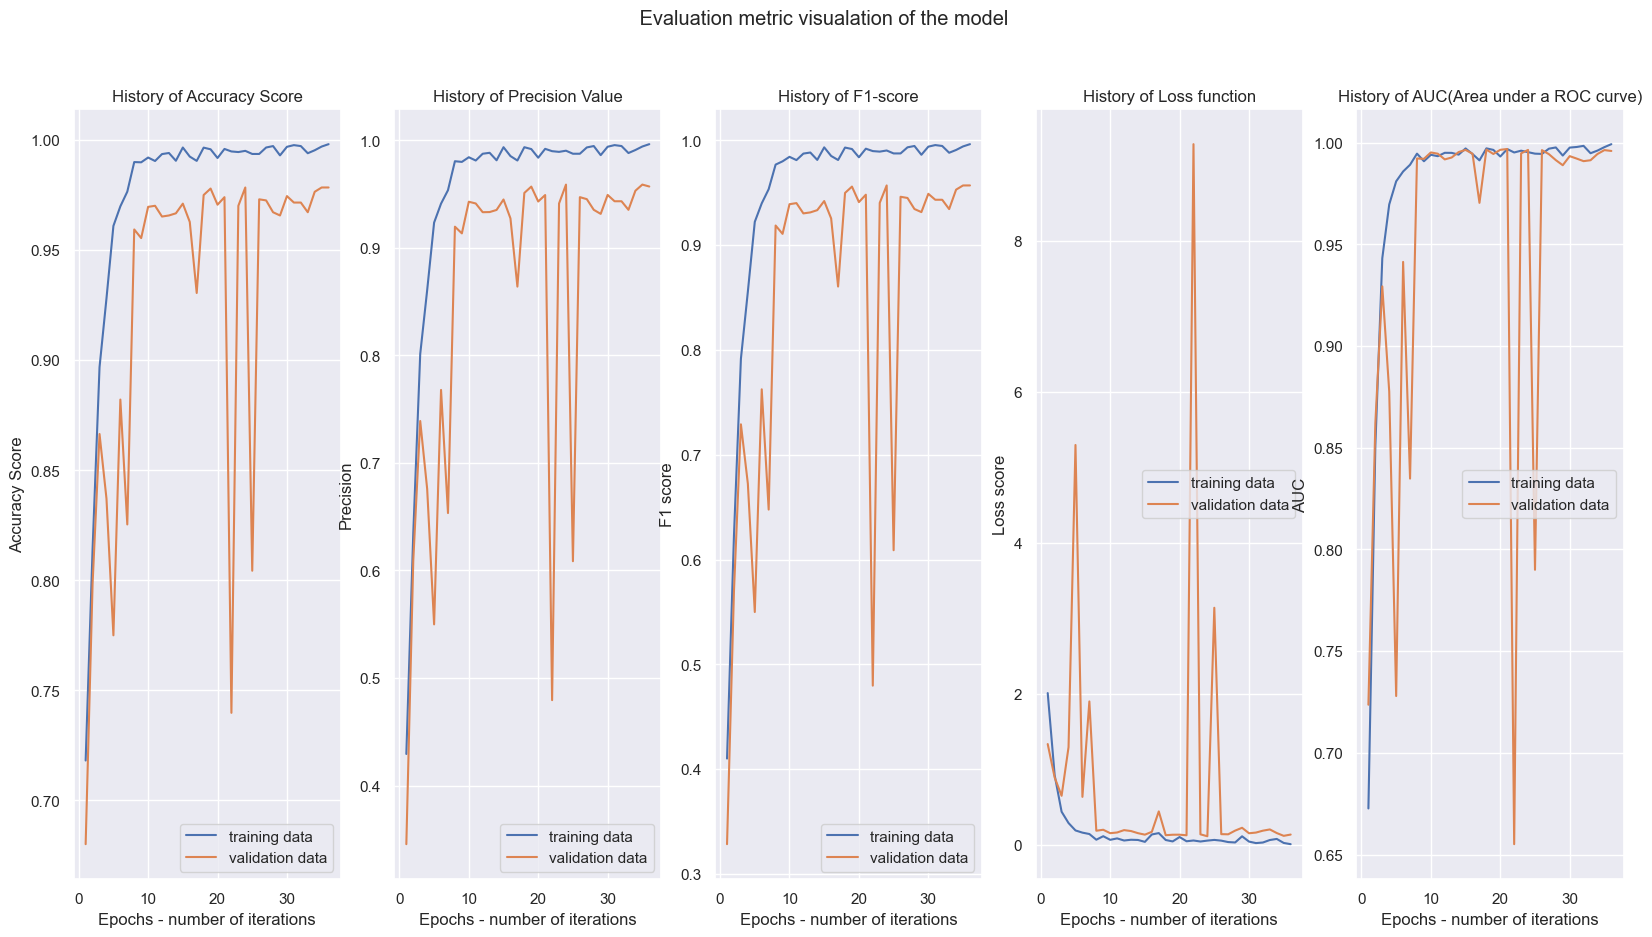

In [85]:
plotting_train_vs_validation(history6.history['accuracy'],history6.history['val_accuracy'],
               history6.history['loss'],history6.history['val_loss'],
               history6.history['auc'],history6.history['val_auc'],
               history6.history['precision'],history6.history['val_precision'],
               history6.history['F1_score_metric'],history6.history['val_F1_score_metric']
              )

In [86]:
eval_scores_6 = merged.evaluate(test_data)

40/40 [==============================] - 29s 735ms/step - loss: 3.0213 - precision: 0.5534 - recall: 0.5473 - accuracy: 0.7764 - auc: 0.7708 - F1_score_metric: 0.5502


In [87]:
print("Accuracy Score = ", eval_scores_6[3])
print("Precision Value = ", eval_scores_6[1])
print("Recall Value = ", eval_scores_6[2])
print("AUC = ", eval_scores_6[4])
print("F1 Score = ", eval_scores_6[5])

Accuracy Score =  0.7763878107070923
Precision Value =  0.5533596873283386
Recall Value =  0.5473026037216187
AUC =  0.7708011269569397
F1 Score =  0.5501870512962341


### Model F: GoogleNet

In [88]:
# create model
def inception_layers(x, filters):
    # 1x1
    path_1 = Conv2D(filters=filters[0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)

    # 1x1->3x3
    path_2 = Conv2D(filters=filters[1][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
    path_2 = Conv2D(filters=filters[1][1], kernel_size=(3,3), strides=1, padding='same', activation='relu')(path_2)
    
    # 1x1->5x5
    path_3 = Conv2D(filters=filters[2][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
    path_3 = Conv2D(filters=filters[2][1], kernel_size=(5,5), strides=1, padding='same', activation='relu')(path_3)

    # 3x3->1x1
    path_4 = MaxPooling2D(pool_size=(3,3), strides=1, padding='same')(x)
    path_4 = Conv2D(filters=filters[3], kernel_size=(1,1), strides=1, padding='same', activation='relu')(path_4)

    return Concatenate(axis=-1)([path_1,path_2,path_3,path_4])

In [89]:
def auxiliary_layer(x, name=None):
    aux_layer = AveragePooling2D(pool_size=(5,5), strides=3, padding='valid')(x)
    aux_layer = Conv2D(filters=128, kernel_size=(1,1), strides=1, padding='same', activation='relu')(aux_layer)
    aux_layer = Flatten()(aux_layer)
    aux_layer = Dense(units=256, activation='relu')(aux_layer)
    aux_layer = Dropout(0.4)(aux_layer)
    aux_layer = Dense(units=class_num, activation='softmax', name=name)(aux_layer)
    return aux_layer

In [90]:
def googLeNet():
    layer_input = Input(shape=shape_image)
    
    # stage-1
    layer_googleNet = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='same', activation='relu')(layer_input)
    layer_googleNet = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer_googleNet)
    layer_googleNet = BatchNormalization()(layer_googleNet)

    # stage-2
    layer_googleNet= Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', activation='relu')(layer_googleNet)
    layer_googleNet= Conv2D(filters=192, kernel_size=(3,3), strides=1, padding='same', activation='relu')(layer_googleNet)
    layer_googleNet= BatchNormalization()(layer_googleNet)
    layer_googleNet= MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer_googleNet)

    # stage-3
    layer_googleNet= inception_layers(layer_googleNet, [ 64,  (96,128), (16,32), 32]) #3a
    layer_googleNet= inception_layers(layer_googleNet, [128, (128,192), (32,96), 64]) #3b
    layer_googleNet= MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer_googleNet)
    
    # stage-4
    layer_googleNet= inception_layers(layer_googleNet, [192,  (96,208),  (16,48),  64]) #4a
    aux1  = auxiliary_layer(layer_googleNet, name='aux1')
    layer_googleNet= inception_layers(layer_googleNet, [160, (112,224),  (24,64),  64]) #4b
    layer_googleNet= inception_layers(layer_googleNet, [128, (128,256),  (24,64),  64]) #4c
    layer_googleNet= inception_layers(layer_googleNet, [112, (144,288),  (32,64),  64]) #4d
    aux2  = auxiliary_layer(layer_googleNet, name='aux2')
    layer_googleNet= inception_layers(layer_googleNet, [256, (160,320), (32,128), 128]) #4e
    layer_googleNet= MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer_googleNet)
    
    # stage-5
    layer_googleNet= inception_layers(layer_googleNet, [256, (160,320), (32,128), 128]) #5a
    layer_googleNet= inception_layers(layer_googleNet, [384, (192,384), (48,128), 128]) #5b
    
    # stage-6
    layer_googleNet= Flatten()(layer_googleNet)
    layer_googleNet= Dropout(0.4)(layer_googleNet)
    layer_googleNet= Dense(units=256, activation='linear')(layer_googleNet)
    main = Dense(units=class_num, activation='softmax', name='main')(layer_googleNet)
    
    model = Model(inputs=layer_input, outputs=[main, aux1, aux2])
    
    return model

In [91]:
model7 = googLeNet()

In [92]:
model7.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_102 (Conv2D)            (None, 64, 64, 64)   9472        ['input_9[0][0]']                
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 32, 32, 64)  0           ['conv2d_102[0][0]']             
                                                                                                  
 batch_normalization_98 (BatchN  (None, 32, 32, 64)  256         ['max_pooling2d_4[0][0]']  

 conv2d_127 (Conv2D)            (None, 8, 8, 24)     12312       ['concatenate_4[0][0]']          
                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 8, 8, 512)   0           ['concatenate_4[0][0]']          
 )                                                                                                
                                                                                                  
 conv2d_124 (Conv2D)            (None, 8, 8, 160)    82080       ['concatenate_4[0][0]']          
                                                                                                  
 conv2d_126 (Conv2D)            (None, 8, 8, 224)    226016      ['conv2d_125[0][0]']             
                                                                                                  
 conv2d_128 (Conv2D)            (None, 8, 8, 64)     38464       ['conv2d_127[0][0]']             
          

 conv2d_152 (Conv2D)            (None, 4, 4, 32)     26656       ['max_pooling2d_14[0][0]']       
                                                                                                  
 max_pooling2d_15 (MaxPooling2D  (None, 4, 4, 832)   0           ['max_pooling2d_14[0][0]']       
 )                                                                                                
                                                                                                  
 conv2d_149 (Conv2D)            (None, 4, 4, 256)    213248      ['max_pooling2d_14[0][0]']       
                                                                                                  
 conv2d_151 (Conv2D)            (None, 4, 4, 320)    461120      ['conv2d_150[0][0]']             
                                                                                                  
 conv2d_153 (Conv2D)            (None, 4, 4, 128)    102528      ['conv2d_152[0][0]']             
          

In [93]:
model7.compile(optimizer='adam', loss='categorical_crossentropy',metrics=eval_metrics)

In [114]:
history7=model7.fit(training_data,
                  class_weight = train_class_weights,
                  epochs = 15,
                  verbose = 1,
                  validation_data=validation_data,
                  callbacks=[
                             EarlyStopping(
                             monitor='val_auc',
                             patience=15,
                             restore_best_weights = True
                             )
                            ])

Epoch 1/15
145/145 [==============================] - 92s 632ms/step - loss: 4.2244 - main_loss: 1.4152 - aux1_loss: 1.3871 - aux2_loss: 1.4221 - main_precision: 0.0857 - main_recall: 0.0013 - main_accuracy: 0.7469 - main_auc: 0.6316 - main_F1_score_metric: 0.0021 - aux1_precision: 0.1619 - aux1_recall: 0.0037 - aux1_accuracy: 0.7461 - aux1_auc: 0.6485 - aux1_F1_score_metric: 0.0057 - aux2_precision: 0.2336 - aux2_recall: 0.0054 - aux2_accuracy: 0.7469 - aux2_auc: 0.6131 - aux2_F1_score_metric: 0.0080 - val_loss: 4.0266 - val_main_loss: 1.3746 - val_aux1_loss: 1.2856 - val_aux2_loss: 1.3665 - val_main_precision: 0.0000e+00 - val_main_recall: 0.0000e+00 - val_main_accuracy: 0.7500 - val_main_auc: 0.6536 - val_main_F1_score_metric: 0.0000e+00 - val_aux1_precision: 0.0000e+00 - val_aux1_recall: 0.0000e+00 - val_aux1_accuracy: 0.7500 - val_aux1_auc: 0.7859 - val_aux1_F1_score_metric: 0.0000e+00 - val_aux2_precision: 0.0000e+00 - val_aux2_recall: 0.0000e+00 - val_aux2_accuracy: 0.7500 - val

Epoch 5/15
145/145 [==============================] - 96s 660ms/step - loss: 4.1605 - main_loss: 1.3870 - aux1_loss: 1.3860 - aux2_loss: 1.3875 - main_precision: 0.0000e+00 - main_recall: 0.0000e+00 - main_accuracy: 0.7500 - main_auc: 0.3763 - main_F1_score_metric: 0.0000e+00 - aux1_precision: 0.4545 - aux1_recall: 0.0011 - aux1_accuracy: 0.7499 - aux1_auc: 0.4267 - aux1_F1_score_metric: 0.0019 - aux2_precision: 0.0000e+00 - aux2_recall: 0.0000e+00 - aux2_accuracy: 0.7500 - aux2_auc: 0.4484 - aux2_F1_score_metric: 0.0000e+00 - val_loss: 4.1800 - val_main_loss: 1.3995 - val_aux1_loss: 1.3820 - val_aux2_loss: 1.3985 - val_main_precision: 0.0000e+00 - val_main_recall: 0.0000e+00 - val_main_accuracy: 0.7500 - val_main_auc: 0.2896 - val_main_F1_score_metric: 0.0000e+00 - val_aux1_precision: 0.0000e+00 - val_aux1_recall: 0.0000e+00 - val_aux1_accuracy: 0.7500 - val_aux1_auc: 0.5689 - val_aux1_F1_score_metric: 0.0000e+00 - val_aux2_precision: 0.0000e+00 - val_aux2_recall: 0.0000e+00 - val_aux

Epoch 9/15
145/145 [==============================] - 92s 633ms/step - loss: 3.8169 - main_loss: 1.3832 - aux1_loss: 1.1866 - aux2_loss: 1.2472 - main_precision: 0.2821 - main_recall: 0.0072 - main_accuracy: 0.7472 - main_auc: 0.5987 - main_F1_score_metric: 0.0105 - aux1_precision: 0.6002 - aux1_recall: 0.1579 - aux1_accuracy: 0.7632 - aux1_auc: 0.7038 - aux1_F1_score_metric: 0.2367 - aux2_precision: 0.5873 - aux2_recall: 0.0926 - aux2_accuracy: 0.7569 - aux2_auc: 0.7005 - aux2_F1_score_metric: 0.1366 - val_loss: 3.5942 - val_main_loss: 1.3864 - val_aux1_loss: 1.1139 - val_aux2_loss: 1.0939 - val_main_precision: 0.0000e+00 - val_main_recall: 0.0000e+00 - val_main_accuracy: 0.7500 - val_main_auc: 0.5121 - val_main_F1_score_metric: 0.0000e+00 - val_aux1_precision: 0.8017 - val_aux1_recall: 0.1820 - val_aux1_accuracy: 0.7842 - val_aux1_auc: 0.7794 - val_aux1_F1_score_metric: 0.2921 - val_aux2_precision: 0.8151 - val_aux2_recall: 0.1898 - val_aux2_accuracy: 0.7867 - val_aux2_auc: 0.7903 - 

Epoch 13/15
145/145 [==============================] - 91s 624ms/step - loss: 2.4222 - main_loss: 0.8373 - aux1_loss: 0.7816 - aux2_loss: 0.8034 - main_precision: 0.5947 - main_recall: 0.2703 - main_accuracy: 0.7715 - main_auc: 0.7855 - main_F1_score_metric: 0.3563 - aux1_precision: 0.6245 - aux1_recall: 0.2926 - aux1_accuracy: 0.7792 - aux1_auc: 0.7923 - aux1_F1_score_metric: 0.3898 - aux2_precision: 0.5994 - aux2_recall: 0.2707 - aux2_accuracy: 0.7725 - aux2_auc: 0.7893 - aux2_F1_score_metric: 0.3626 - val_loss: 2.9748 - val_main_loss: 0.9503 - val_aux1_loss: 1.0383 - val_aux2_loss: 0.9862 - val_main_precision: 0.6678 - val_main_recall: 0.3738 - val_main_accuracy: 0.7970 - val_main_auc: 0.8163 - val_main_F1_score_metric: 0.4755 - val_aux1_precision: 0.6237 - val_aux1_recall: 0.2270 - val_aux1_accuracy: 0.7725 - val_aux1_auc: 0.7738 - val_aux1_F1_score_metric: 0.3276 - val_aux2_precision: 0.6314 - val_aux2_recall: 0.3855 - val_aux2_accuracy: 0.7901 - val_aux2_auc: 0.7988 - val_aux2_F1

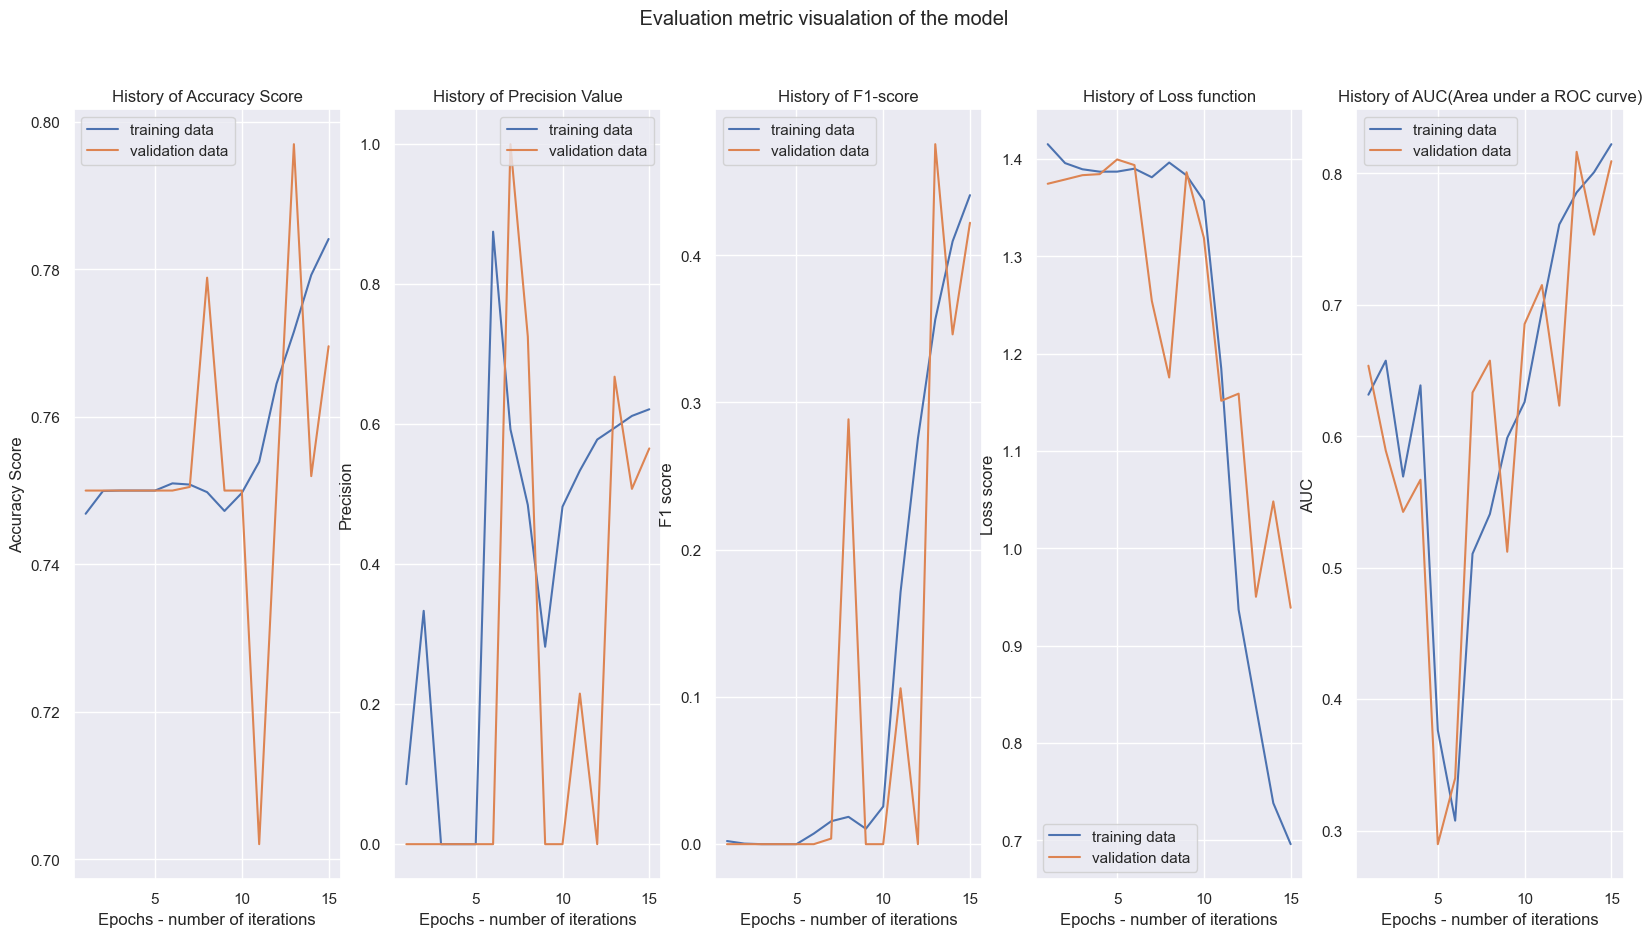

In [115]:
plotting_train_vs_validation(history7.history['main_accuracy'],history7.history['val_main_accuracy'],
               history7.history['main_loss'],history7.history['val_main_loss'],
               history7.history['main_auc'],history7.history['val_main_auc'],
               history7.history['main_precision'],history7.history['val_main_precision'],
               history7.history['main_F1_score_metric'],history7.history['val_main_F1_score_metric']
              )

In [116]:
eval_scores_7 = model7.evaluate(test_data)

40/40 [==============================] - 5s 125ms/step - loss: 2.9393 - main_loss: 0.9945 - aux1_loss: 0.9550 - aux2_loss: 0.9898 - main_precision: 0.6621 - main_recall: 0.3370 - main_accuracy: 0.7912 - main_auc: 0.8096 - main_F1_score_metric: 0.4430 - aux1_precision: 0.6702 - aux1_recall: 0.3495 - aux1_accuracy: 0.7944 - aux1_auc: 0.8184 - aux1_F1_score_metric: 0.4566 - aux2_precision: 0.6502 - aux2_recall: 0.3401 - aux2_accuracy: 0.7893 - aux2_auc: 0.8094 - aux2_F1_score_metric: 0.4437


In [117]:
print("Accuracy Score = ", eval_scores_7[3])
print("Precision Value = ", eval_scores_7[1])
print("Recall Value = ", eval_scores_7[2])
print("AUC = ", eval_scores_7[4])
print("F1 Score = ", eval_scores_7[5])

Accuracy Score =  0.9898262619972229
Precision Value =  0.994463324546814
Recall Value =  0.9549833536148071
AUC =  0.6620583534240723
F1 Score =  0.33698201179504395


## Comparison on all models with a table

In [118]:
data = [
        ['Accuracy',
        round(eval_scores[3],2), 
         round(eval_scores_2[3],2), 
         round(eval_scores_3[3],2), 
         round(eval_scores_4[3],2), 
         round(eval_scores_5[3],2), 
         round(eval_scores_6[3],2), 
         round(eval_scores_7[3],2)],
        ['Precision',
        round(eval_scores[1],2), 
         round(eval_scores_2[1],2), 
         round(eval_scores_3[1],2), 
         round(eval_scores_4[1],2), 
         round(eval_scores_5[1],2), 
         round(eval_scores_6[1],2), 
         round(eval_scores_7[1],2)],
        ['Recall',
        round(eval_scores[2],2), 
         round(eval_scores_2[2],2), 
         round(eval_scores_3[2],2), 
         round(eval_scores_4[2],2), 
         round(eval_scores_5[2],2), 
         round(eval_scores_6[2],2), 
         round(eval_scores_7[2],2)],
         ['AUC',
         round(eval_scores[4],2), 
         round(eval_scores_2[4],2), 
         round(eval_scores_3[4],2), 
         round(eval_scores_4[4],2), 
         round(eval_scores_5[4],2), 
         round(eval_scores_6[4],2), 
         round(eval_scores_7[4],2)],
         ['F1 score',
         round(eval_scores[5],2), 
         round(eval_scores_2[5],2), 
         round(eval_scores_3[5],2), 
         round(eval_scores_4[5],2), 
         round(eval_scores_5[5],2), 
         round(eval_scores_6[5],2), 
         round(eval_scores_7[5],2)]
        ]
column_names = ['Baseline Model', 'Model A', 'Model B', 'Model C', 'Model D', 'Model E', 'Model F']

In [119]:
print(tabulate(data, headers=column_names, tablefmt="fancy_grid", showindex='always'))

╒════╤═══════════╤══════════════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│    │           │   Baseline Model │   Model A │   Model B │   Model C │   Model D │   Model E │   Model F │
╞════╪═══════════╪══════════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│  0 │ Accuracy  │             0.78 │      0.8  │      0.71 │      0.8  │      0.8  │      0.78 │      0.99 │
├────┼───────────┼──────────────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  1 │ Precision │             0.62 │      0.61 │      0.21 │      0.65 │      0.76 │      0.55 │      0.99 │
├────┼───────────┼──────────────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  2 │ Recall    │             0.33 │      0.59 │      0.06 │      0.41 │      0.27 │      0.55 │      0.95 │
├────┼───────────┼──────────────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│  3 │ AUC

## Confusion Matrix Plot

### Baseline Model

In [120]:
# Setting actual y values and predicted y values
y_ = baseline_model.predict(test_data)
y_predict = y_.argmax(axis=-1)
actual_y = test_data.classes

40/40 [==============================] - 7s 165ms/step


In [121]:
# Setting the classes within the dataset
n_classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

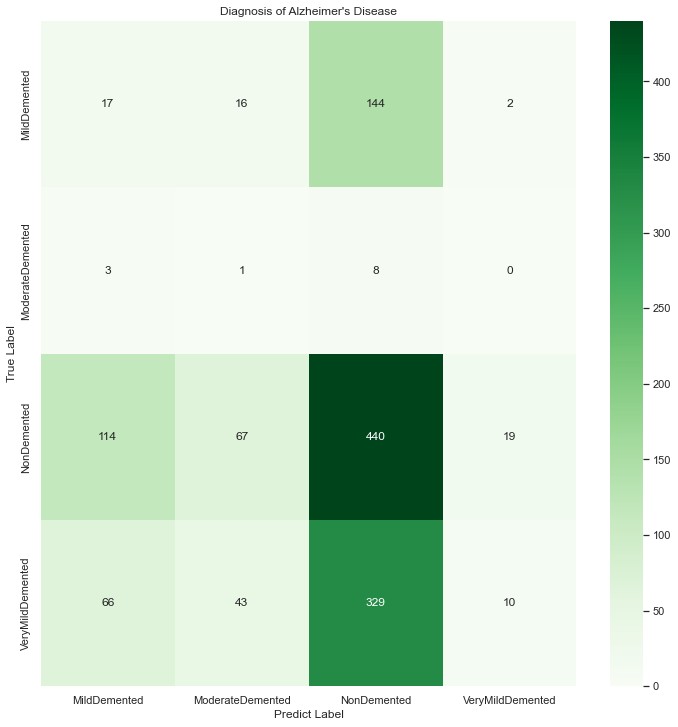

In [122]:
baseline_cm = confusion_matrix(actual_y, y_predict)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(baseline_cm, cmap='Greens', annot=True, fmt='d', xticklabels=n_classes, yticklabels=n_classes)
plt.title('Diagnosis of Alzheimer\'s Disease')
plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.show(ax)

### Model A

In [123]:
# Setting actual y values and predicted y values
y_ = model2.predict(test_data)
y_predict = y_.argmax(axis=-1)
actual_y = test_data.classes

40/40 [==============================] - 5s 128ms/step


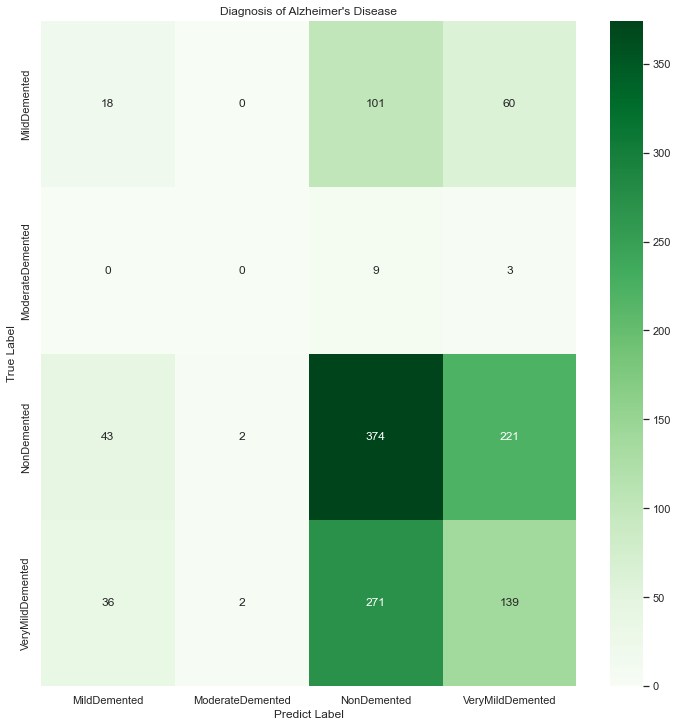

In [124]:
cm2 = confusion_matrix(actual_y, y_predict)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(cm2, cmap='Greens', annot=True, fmt='d', xticklabels=n_classes, yticklabels=n_classes)
plt.title('Diagnosis of Alzheimer\'s Disease')
plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.show(ax)

### Model B

In [125]:
# Setting actual y values and predicted y values
y_ = model3.predict(test_data)
y_predict = y_.argmax(axis=-1)
actual_y = test_data.classes

40/40 [==============================] - 19s 484ms/step


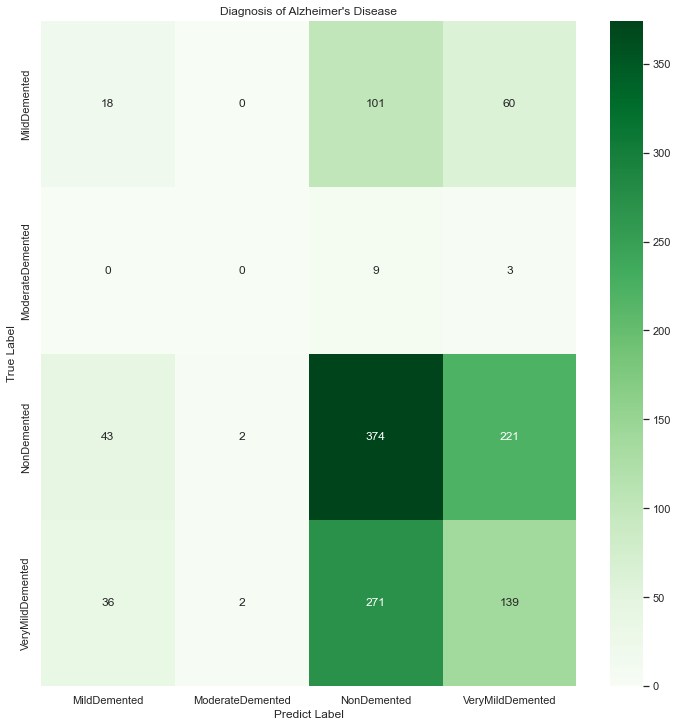

In [126]:
cm3 = confusion_matrix(actual_y, y_predict)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(cm2, cmap='Greens', annot=True, fmt='d', xticklabels=n_classes, yticklabels=n_classes)
plt.title('Diagnosis of Alzheimer\'s Disease')
plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.show(ax)

### Model C

In [127]:
# Setting actual y values and predicted y values
y_ = model4.predict(test_data)
y_predict = y_.argmax(axis=-1)
actual_y = test_data.classes

40/40 [==============================] - 25s 634ms/step


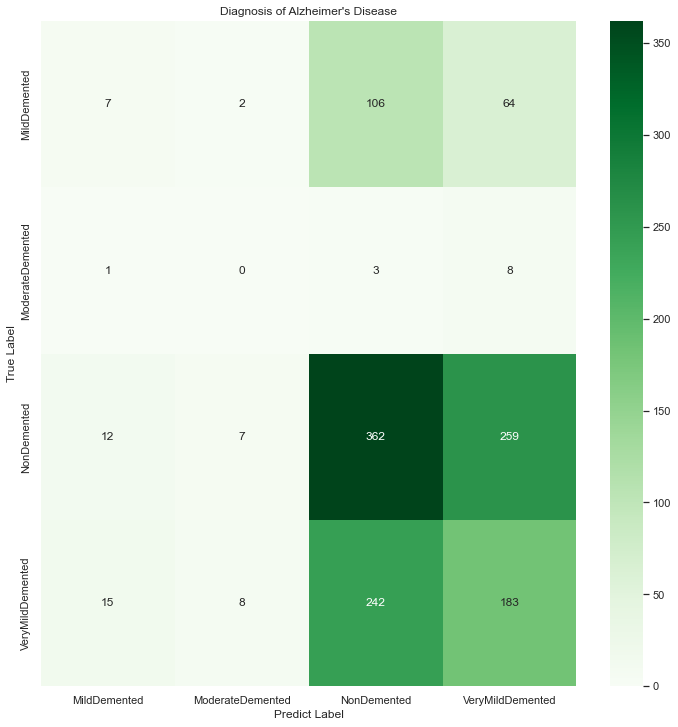

In [128]:
cm4 = confusion_matrix(actual_y, y_predict)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(cm4, cmap='Greens', annot=True, fmt='d', xticklabels=n_classes, yticklabels=n_classes)
plt.title('Diagnosis of Alzheimer\'s Disease')
plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.show(ax)

### Model D

In [129]:
# Setting actual y values and predicted y values
y_ = model5.predict(test_data)
y_predict = y_.argmax(axis=-1)
actual_y = test_data.classes

40/40 [==============================] - 31s 786ms/step


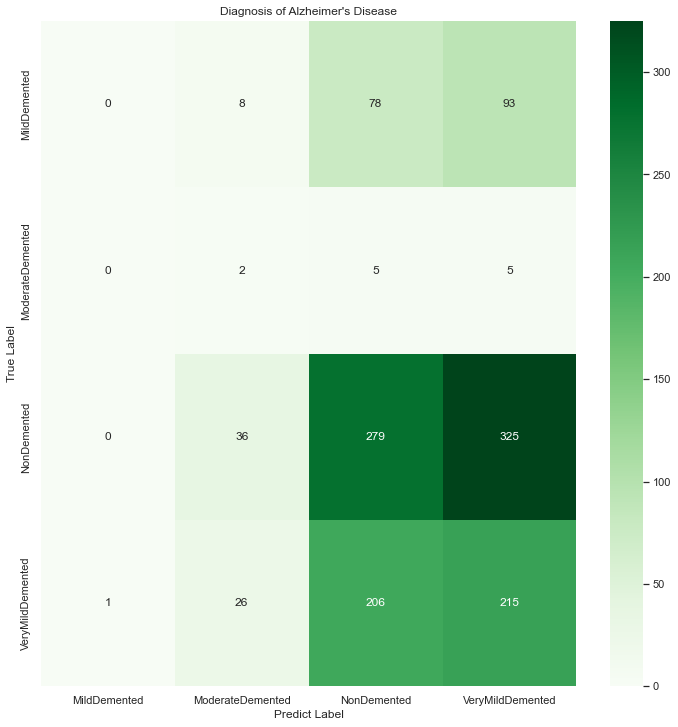

In [130]:
cm5 = confusion_matrix(actual_y, y_predict)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(cm5, cmap='Greens', annot=True, fmt='d', xticklabels=n_classes, yticklabels=n_classes)
plt.title('Diagnosis of Alzheimer\'s Disease')
plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.show(ax)

### Model E

In [131]:
# Setting actual y values and predicted y values
y_ = merged.predict(test_data)
y_predict = np.argmax(y_, axis=1)
actual_y = test_data.classes

40/40 [==============================] - 30s 741ms/step


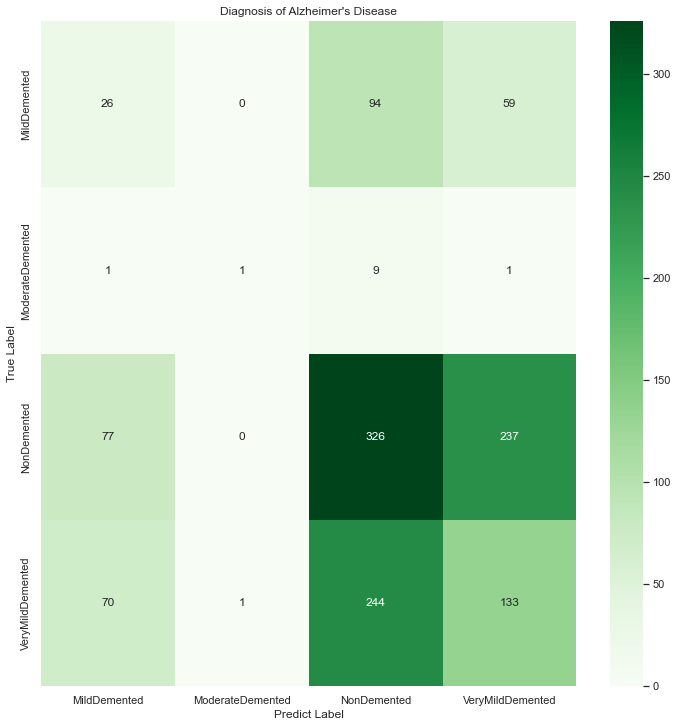

In [132]:
cm6 = confusion_matrix(actual_y, y_predict)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(cm6, cmap='Greens', annot=True, fmt='d', xticklabels=n_classes, yticklabels=n_classes)
plt.title('Diagnosis of Alzheimer\'s Disease')
plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.show(ax)

## Overall Analysis

<p>Based on the observations, the most optimal model that is consistent and that can be used in the medical field would be <b>Model A, MobileNetV2 with CNN layers through transfer learning</b> which is essentially using MobileNetV2 as the main model where Conv2D layers were added to extract features from the processed image in the MobileNetV2, which are then fed into other layers that can detect the stages of Alzheimer's Disease which is where transfer learning is applied. This strategy displayed more promising results as I was able to detect the stages of Alzheimer's Disease better than the other models.</p> 

## Summary

<p> In this project, the <b>Alzheimer's MRI dataset</b> was obtained from Kaggle. This was pre-processed using <b>ImageDataGenerator</b> and <b>flow_from_directory</b>libraries.</p> 
<p>Due to the imbalance in data, class weights were used to input into the model to be fit to produce more accurate results. There were a few models developed using pre-trained models which were modified through transfer learning. The importance of the data augmentation was tested using the baseline model through the evaluation metrics from which a conclusion was drawn that data augmentation was not necessary for <b>structured data</b> such as the <b>MRI brain scan dataset</b>.</p> 
<p>The models were evaluated using the various evaluation metrics where the <b>'val_auc'</b> was monitored closely to apply Early Stopping for better efficiency of the model and as a regularisation technique to attempt to prevent overfitting. The evaluation scores across the epochs were also drawn between the training and validation data which was used along with the confusion matrix displays to determine the best models. The testing score was also then used to produce the best model which was <b>Model A</b>.</p>